# regresión lineal

## Plan
* Leer archivos
* Ejecutar Regresión Multilineal
* Ejectutar LGBMRegresor

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt

In [3]:
pd.set_option('display.max_colwidth', None)

In [4]:
p_test=0.1

In [5]:
#trm_reg_df=pd.read_csv('2.RESULTADOS/base_reg_trm.csv', sep=',',encoding = "ISO-8859-1", engine='python', decimal=".")
#petroleo_reg_df=pd.read_csv('2.RESULTADOS/base_reg_petroleo.csv', sep=',',encoding = "ISO-8859-1", engine='python', decimal=".")
#oro_reg_df=pd.read_csv('2.RESULTADOS/base_reg_oro.csv', sep=',',encoding = "ISO-8859-1", engine='python', decimal=".")

In [6]:
#trm_corr_df=pd.read_csv('2.RESULTADOS/resultados_corr_trm.csv', sep=',',encoding = "ISO-8859-1", engine='python', decimal=".")
#petroleo_corr_df=pd.read_csv('2.RESULTADOS/resultados_corr_petroleo.csv', sep=',',encoding = "ISO-8859-1", engine='python', decimal=".")
#oro_corr_df=pd.read_csv('2.RESULTADOS/resultados_corr_oro.csv', sep=',',encoding = "ISO-8859-1", engine='python', decimal=".")

In [7]:
trm_reg_df=pd.read_csv('2.RESULTADOS/base_reg_petroleo.csv', sep=',',encoding = "ISO-8859-1", engine='python', decimal=".")

In [8]:
trm_corr_df=pd.read_csv('2.RESULTADOS/resultados_corr_petroleo.csv', sep=',',encoding = "ISO-8859-1", engine='python', decimal=".")

In [9]:
trm_reg_df.set_index('date',inplace=True)

In [10]:
trm_corr_df.describe()

,Unnamed: 0,cuenta,corr,corrPearson,corrKendall,corrSpearman
count,166.000000,166.000000,164.000000,164.000000,164.000000,164.000000
mean,82.500000,40.584337,0.004094,0.004094,0.016065,0.019015
std,48.064193,15.971247,0.198606,0.198606,0.154249,0.202165
min,0.000000,1.000000,-0.859043,-0.859043,-0.644503,-0.806644
25%,41.250000,37.000000,-0.106861,-0.106861,-0.055006,-0.091409
50%,82.500000,40.500000,-0.014097,-0.014097,0.005168,0.014364
75%,123.750000,52.000000,0.083838,0.083838,0.066940,0.098195
max,165.000000,71.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
trm_corr_df

,Unnamed: 0,id,cuenta,corr,corrPearson,corrKendall,corrSpearman,tipo
0,0,twitter_MantillaIgnacio,71,-0.157514,-0.157514,-0.116345,-0.176478,twitter
1,1,twitter_BancoRepublica,71,-0.030168,-0.030168,-0.043093,-0.068882,twitter
2,2,twitter_NASA,69,-0.036942,-0.036942,-0.073758,-0.095817,twitter
3,3,twitter_ecofeminita,68,0.018170,0.018170,0.043975,0.061522,twitter
4,4,twitter_Fondosdepension,68,0.112003,0.112003,0.009670,0.011911,twitter
...,...,...,...,...,...,...,...,...
161,161,twitter_alhosu,6,0.441420,0.441420,0.466667,0.714286,twitter
162,162,rss_https://feeds.a.dj.com/rss/RSSLifestyle.xml,5,0.826167,0.826167,0.600000,0.700000,rss
163,163,twitter_NoelMllr,2,1.000000,1.000000,1.000000,1.000000,twitter
164,164,twitter_jscorrales,1,NaN,NaN,NaN,NaN,twitter


In [12]:
#eliminar estas columnas
trm_corr_df[trm_corr_df['cuenta']<5]['id'].values

array(['twitter_NoelMllr', 'twitter_jscorrales', 'twitter_RaquelBernal3'],
      dtype=object)

In [13]:
trm_reg_df.shape

(72, 167)

In [14]:
trm_reg_df.drop(columns=trm_corr_df[trm_corr_df['cuenta']<5]['id'].values,inplace=True)

In [15]:
#quitar nullos
trm_reg_df=trm_reg_df[trm_reg_df['Diferencia'].notnull()]

In [16]:
val=trm_reg_df.isnull().sum().to_frame()
val

,0
rss_http://elnacional.com.do/feed/,0
rss_http://ep00.epimg.net/rss/economia/portada.xml,0
rss_http://ep00.epimg.net/rss/tags/ultimas_noticias.xml,0
rss_http://feeds.nytimes.com/nyt/rss/Business,0
rss_http://feeds.nytimes.com/nyt/rss/Technology,0
...,...
twitter_rodriguezbraun,0
twitter_sergiodigra,0
twitter_suanzes,0
twitter_wef,0


In [17]:
val[val[0]>0]

,0


In [18]:
val2=trm_reg_df.sum().to_frame()
val2

,0
rss_http://elnacional.com.do/feed/,-20.117528
rss_http://ep00.epimg.net/rss/economia/portada.xml,-13.306312
rss_http://ep00.epimg.net/rss/tags/ultimas_noticias.xml,7.144344
rss_http://feeds.nytimes.com/nyt/rss/Business,-0.252646
rss_http://feeds.nytimes.com/nyt/rss/Technology,-1.112533
...,...
twitter_rodriguezbraun,-29.324336
twitter_sergiodigra,-22.523059
twitter_suanzes,-27.107259
twitter_wef,15.006439


In [19]:
val2[val2[0]==0]

,0


In [20]:
trm_reg_df

,rss_http://elnacional.com.do/feed/,rss_http://ep00.epimg.net/rss/economia/portada.xml,rss_http://ep00.epimg.net/rss/tags/ultimas_noticias.xml,rss_http://feeds.nytimes.com/nyt/rss/Business,rss_http://feeds.nytimes.com/nyt/rss/Technology,rss_http://feeds.washingtonpost.com/rss/national,rss_http://feeds.washingtonpost.com/rss/national/energy-environment,rss_http://feeds.washingtonpost.com/rss/politics,rss_http://feeds.washingtonpost.com/rss/rss_blogpost,rss_http://feeds.washingtonpost.com/rss/rss_digger,...,twitter_rafaelpuyana,twitter_razuero,twitter_rchicave,twitter_rcnmundo,twitter_rcnradio,twitter_rodriguezbraun,twitter_sergiodigra,twitter_suanzes,twitter_wef,Diferencia
date,,,,,,,,,,,,,,,,,,,,,
2021-12-30,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.441825,0.000000,0.000000,0.000000,...,0.000,0.000,0.000000,0.000000,0.000000,0.000000,-0.793750,0.00000,0.000000,1.37
2021-12-31,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000,0.000,0.000000,0.000000,0.000000,0.000000,-0.811500,0.00000,0.000000,-1.01
2022-01-03,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.592650,0.000000,0.000000,0.000000,...,-0.948,0.000,0.000000,0.000000,0.000000,0.000000,-0.707000,0.00000,0.000000,-1.14
2022-01-04,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,-0.051600,0.000000,0.000000,0.000000,...,0.000,-0.004,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,-1.21
2022-01-05,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.510600,0.000000,0.000000,0.000000,...,0.000,0.000,0.000000,0.000000,0.000000,0.000000,-0.962000,0.00000,0.000000,-1.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-04,-0.798600,0.000,0.679200,0.097250,-0.318000,-0.174286,-0.141000,0.219250,-0.513000,-0.153500,...,0.000,0.000,-0.445250,-0.531971,-0.494500,-0.539591,-0.468714,-0.66075,0.356000,1.55
2022-04-05,-0.496258,0.000,0.106250,-0.062000,0.389714,-0.452111,-0.056333,0.042391,-0.486111,0.367667,...,-0.669,0.000,-0.548857,-0.485640,-0.463833,-0.496900,-0.335000,-0.99800,0.395250,5.79
2022-04-06,-0.454767,-0.987,-0.322667,0.098114,-0.209667,-0.354214,0.130000,-0.209111,-0.082806,-0.012250,...,-0.982,0.000,-0.341200,-0.556240,-0.574667,-0.459125,-0.836000,0.00000,0.292583,0.98


In [21]:
y_train = trm_reg_df['Diferencia']
X_train = trm_reg_df.drop(columns=['Diferencia'])

### División columnas en lotes

In [22]:
X_train.shape

(72, 163)

In [23]:
X_train1  = X_train.iloc[: , :55]

In [24]:
# Cálculo VIFs
vif = pd.DataFrame()
vif['Features'] = X_train1.columns
vif['VIF'] = [variance_inflation_factor(X_train1.values, i) for i in range(X_train1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
26,rss_http://rssfeeds.usatoday.com/UsatodaycomNation-TopStories,215.50
0,rss_http://elnacional.com.do/feed/,159.56
31,rss_http://www.eltiempo.com/rss/economia.xml,128.11
33,rss_http://www.eltiempo.com/rss/economia_finanzas-personales.xml,118.14
40,rss_http://www.eltiempo.com/rss/tecnosfera.xml,107.05
35,rss_http://www.eltiempo.com/rss/economia_sectores.xml,90.48
38,rss_http://www.eltiempo.com/rss/mundo_europa.xml,76.35
36,rss_http://www.eltiempo.com/rss/mundo.xml,70.33
16,rss_http://feeds.washingtonpost.com/rss/sports,67.29
28,rss_http://www.eltiempo.com/rss/colombia.xml,65.02


In [25]:
#Seleccionar VIF menores a 50
seleccionColumnas1= vif[vif['VIF']<50]['Features'].values

In [26]:
X_train1=X_train1[seleccionColumnas1]

In [27]:
len(seleccionColumnas1)

43

In [28]:
X_train_lm = sm.add_constant(X_train1)
lr_1 = sm.OLS(y_train, X_train_lm).fit()
lr_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Diferencia   R-squared:                       0.636
Model:                            OLS   Adj. R-squared:                  0.078
Method:                 Least Squares   F-statistic:                     1.139
Date:                Thu, 28 Apr 2022   Prob (F-statistic):              0.363
Time:                        10:51:43   Log-Likelihood:                -165.98
No. Observations:                  72   AIC:                             420.0
Df Residuals:                      28   BIC:                             520.1
Df Model:                          43                                         
Covariance Type:            nonrobust                                         
===========================================================================================================================================
                                                                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------
const                                                                       0.4915      1.677      0.293      0.772      -2.944       3.927
rss_http://www.portafolio.co/rss/economia                                   2.7104      4.695      0.577      0.568      -6.908      12.329
rss_http://www.portafolio.co/rss/economia/finanzas                          0.6797      3.779      0.180      0.859      -7.060       8.420
rss_http://feeds.washingtonpost.com/rss/national                           -5.6179      5.384     -1.043      0.306     -16.646       5.410
rss_http://www.nytimes.com/services/xml/rss/nyt/World.xml                  -3.0236      8.331     -0.363      0.719     -20.088      14.041
rss_http://feeds.washingtonpost.com/rss/rss_morning-mix                    -1.0070      4.634     -0.217      0.830     -10.499       8.485
rss_http://feeds.washingtonpost.com/rss/rss_blogpost                       -1.8530      5.036     -0.368      0.716     -12.169       8.463
rss_http://rssfeeds.usatoday.com/usatoday-NewsTopStories                   -1.8688      2.069     -0.903      0.374      -6.107       2.370
rss_http://feeds.washingtonpost.com/rss/rss_monkey-cage                     0.5342      3.889      0.137      0.892      -7.433       8.501
rss_http://www.nytimes.com/services/xml/rss/nyt/Sports.xml                 -8.7079      6.073     -1.434      0.163     -21.147       3.731
rss_http://www.nytimes.com/services/xml/rss/nyt/NYRegion.xml               -9.4465      8.485     -1.113      0.275     -26.826       7.933
rss_http://ep00.epimg.net/rss/tags/ultimas_noticias.xml                     0.6643      3.270      0.203      0.840      -6.033       7.362
rss_http://www.eltiempo.com/rss/economia_sector-financiero.xml              1.8937      2.011      0.942      0.354      -2.225       6.013
rss_http://portafolio.co/rss/mis-finanzas                                   1.4429      1.989      0.725      0.474      -2.632       5.518
rss_http://feeds.washingtonpost.com/rss/rss_powerpost                       9.6568      5.125      1.884      0.070      -0.841      20.154
rss_http://www.eltiempo.com/rss/economia_empresas.xml                      -0.8032      2.188     -0.367      0.716      -5.285       3.678
rss_http://feeds.washingtonpost.com/rss/rss_fact-checker                    2.3889      3.889      0.614      0.544      -5.577      10.355
rss_http://www.eltiempo.com/rss/cultura.xml                                 0.0611      4.437      0.014      0.989      -9.028       9.151
rss_http://rss.cnn.com/rss/edition_world.rss                               -1.5675      3.957     -0.396      0.695      -9.673       6.538
rss

In [29]:
pvalue=lr_1.pvalues.to_frame('pvalue')
pvalue[pvalue['pvalue']<=0.3]

,pvalue
rss_http://www.nytimes.com/services/xml/rss/nyt/Sports.xml,0.162656
rss_http://www.nytimes.com/services/xml/rss/nyt/NYRegion.xml,0.275014
rss_http://feeds.washingtonpost.com/rss/rss_powerpost,0.069938
rss_http://feeds.washingtonpost.com/rss/rss_the-fix,0.112370
rss_http://feeds.washingtonpost.com/rss/politics,0.190052
rss_http://portafolio.co/rss/mis-finanzas/vivienda,0.007309
rss_http://www.nytimes.com/services/xml/rss/nyt/Economy.xml,0.075721
rss_http://www.nytimes.com/services/xml/rss/nyt/YourMoney.xml,0.245991
rss_http://portafolio.co/rss/negocios/inversion,0.117595
rss_http://feeds.nytimes.com/nyt/rss/Business,0.132908


In [30]:
seleccionColumnas1=pvalue[pvalue['pvalue']<=0.3].index.values
seleccionColumnas1

array(['rss_http://www.nytimes.com/services/xml/rss/nyt/Sports.xml',
       'rss_http://www.nytimes.com/services/xml/rss/nyt/NYRegion.xml',
       'rss_http://feeds.washingtonpost.com/rss/rss_powerpost',
       'rss_http://feeds.washingtonpost.com/rss/rss_the-fix',
       'rss_http://feeds.washingtonpost.com/rss/politics',
       'rss_http://portafolio.co/rss/mis-finanzas/vivienda',
       'rss_http://www.nytimes.com/services/xml/rss/nyt/Economy.xml',
       'rss_http://www.nytimes.com/services/xml/rss/nyt/YourMoney.xml',
       'rss_http://portafolio.co/rss/negocios/inversion',
       'rss_http://feeds.nytimes.com/nyt/rss/Business'], dtype=object)

### Grupo 2

In [31]:
X_train2  = X_train.iloc[: , 55:110]

In [32]:
# Cálculo VIFs
vif = pd.DataFrame()
vif['Features'] = X_train2.columns
vif['VIF'] = [variance_inflation_factor(X_train2.values, i) for i in range(X_train2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,rss_http://www.portafolio.co/rss/negocios/empresas,774.44
4,rss_http://www.portafolio.co/rss/negocios,561.74
31,twitter_CaracolRadio,439.29
34,twitter_ELTIEMPO,406.28
28,twitter_BluRadioCo,339.40
19,rss_https://www.eltiempo.com/rss/justicia.xml,311.42
23,rss_https://www.eltiempo.com/rss/politica.xml,189.98
8,rss_http://www.reforma.com/rss/negocios.xml,145.41
9,rss_http://www.reforma.com/rss/portada.xml,105.55
6,rss_http://www.reforma.com/rss/internacional.xml,83.46


In [33]:
#Seleccionar VIF menores a 50
seleccionColumnas2= vif[vif['VIF']<50]['Features'].values

In [34]:
len(seleccionColumnas2)

44

In [35]:
X_train2=X_train2[seleccionColumnas2]

In [36]:
X_train_lm = sm.add_constant(X_train2)
lr_1 = sm.OLS(y_train, X_train_lm).fit()
lr_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Diferencia   R-squared:                       0.609
Model:                            OLS   Adj. R-squared:                 -0.028
Method:                 Least Squares   F-statistic:                    0.9559
Date:                Thu, 28 Apr 2022   Prob (F-statistic):              0.563
Time:                        10:51:43   Log-Likelihood:                -168.58
No. Observations:                  72   AIC:                             427.2
Df Residuals:                      27   BIC:                             529.6
Df Model:                          44                                         
Covariance Type:            nonrobust                                         
=============================================================================================================================
                                                                coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------
const                                                         3.4663      5.712      0.607      0.549      -8.255      15.187
rss_https://www.elcomercio.com/feed/                          5.8338      4.190      1.392      0.175      -2.762      14.430
rss_http://www.portafolio.co/rss/internacional               -3.6451      4.304     -0.847      0.404     -12.476       5.186
twitter_Fondosdepension                                       3.9658      3.480      1.140      0.264      -3.175      11.106
rss_https://www.clarin.com/rss/economia/                     -0.6396      4.411     -0.145      0.886      -9.689       8.410
twitter_BancoRepublica                                        8.4582      5.694      1.485      0.149      -3.226      20.142
rss_http://www.reforma.com/rss/justicia.xml                  -2.6416      3.450     -0.766      0.451      -9.720       4.437
rss_https://www.eltiempo.com/rss/mundo_latinoamerica.xml      1.8390      2.585      0.711      0.483      -3.464       7.142
twitter_AlbertoBernalLE                                       3.0219      4.282      0.706      0.486      -5.763      11.807
twitter_BvcColombia                                          -1.0300      3.135     -0.329      0.745      -7.462       5.402
twitter_IECarballo                                           -0.9667      3.618     -0.267      0.791      -8.389       6.456
twitter_JorgeATovar                                           1.9406      2.847      0.682      0.501      -3.900       7.781
twitter_LuisFelipeHenao                                      -0.5654      3.078     -0.184      0.856      -6.882       5.751
rss_https://www.eltiempo.com/rss/mundo_eeuu-y-canada.xml      1.1231      3.116      0.360      0.721      -5.270       7.516
twitter_JoMalagon                                            -1.3747      3.061     -0.449      0.657      -7.656       4.906
twitter_MantillaIgnacio                                      -2.4103      2.399     -1.005      0.324      -7.333       2.513
rss_https://feeds.a.dj.com/rss/RSSWorldNews.xml              -3.4610      4.154     -0.833      0.412     -11.984       5.062
twitter_JorgeARestrepo                                       -1.2882      2.927     -0.440      0.663      -7.295       4.718
twitter_FT                                                   -6.5350     17.308     -0.378      0.709     -42.048      28.978
twitter_MailOnline                                            5.0745     14.212      0.357      0.724     -24.087      34.236
rss_http://www.portafolio.co/rss/economia/gobierno           -1.0899      3.688     -0.295      0.770      -8.658       6.478
twitter_JoseILOPEZ                                         

In [37]:
pvalue=lr_1.pvalues.to_frame('pvalue')
pvalue[pvalue['pvalue']<=0.3]

,pvalue
rss_https://www.elcomercio.com/feed/,0.175145
twitter_Fondosdepension,0.264482
twitter_BancoRepublica,0.149041
rss_https://feeds.a.dj.com/rss/RSSMarketsMain.xml,0.104784
twitter_Jllanosala,0.004906
twitter_LeopoldoTweets,0.200376
rss_https://feeds.a.dj.com/rss/WSJcomUSBusiness.xml,0.031334
twitter_Fedesarrollo,0.255318
rss_http://www.portafolio.co/rss/economia/infraestructura,0.037364
rss_http://www.portafolio.co/rss/economia/impuestos,0.062551


In [38]:
seleccionColumnas2=pvalue[pvalue['pvalue']<=0.3].index.values
seleccionColumnas2

array(['rss_https://www.elcomercio.com/feed/', 'twitter_Fondosdepension',
       'twitter_BancoRepublica',
       'rss_https://feeds.a.dj.com/rss/RSSMarketsMain.xml',
       'twitter_Jllanosala', 'twitter_LeopoldoTweets',
       'rss_https://feeds.a.dj.com/rss/WSJcomUSBusiness.xml',
       'twitter_Fedesarrollo',
       'rss_http://www.portafolio.co/rss/economia/infraestructura',
       'rss_http://www.portafolio.co/rss/economia/impuestos',
       'twitter_MelendezMarcela',
       'rss_https://feeds.a.dj.com/rss/RSSLifestyle.xml',
       'twitter_JavierMejiaC', 'twitter_MauricioCard'], dtype=object)

### Grupo 3

In [39]:
X_train3  = X_train.iloc[: , 110:]

In [40]:
# Cálculo VIFs
vif = pd.DataFrame()
vif['Features'] = X_train3.columns
vif['VIF'] = [variance_inflation_factor(X_train3.values, i) for i in range(X_train3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
22,twitter_bbcmundo,429.70
28,twitter_elcolombiano,412.90
40,twitter_lafm,379.40
11,twitter_PublimetroCol,332.37
8,twitter_NoticiasRCN,244.36
7,twitter_NoticiasCaracol,236.51
13,twitter_RevistaSemana,229.70
47,twitter_rcnmundo,208.64
10,twitter_Portafolioco,189.20
29,twitter_elespectador,172.71


In [41]:
#Seleccionar VIF menores a 50
seleccionColumnas3= vif[vif['VIF']<50]['Features'].values

In [42]:
len(seleccionColumnas3)

37

In [43]:
X_train3=X_train3[seleccionColumnas3]

In [44]:
X_train_lm = sm.add_constant(X_train3)
lr_1 = sm.OLS(y_train, X_train_lm).fit()
lr_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Diferencia   R-squared:                       0.573
Model:                            OLS   Adj. R-squared:                  0.109
Method:                 Least Squares   F-statistic:                     1.234
Date:                Thu, 28 Apr 2022   Prob (F-statistic):              0.269
Time:                        10:51:43   Log-Likelihood:                -171.73
No. Observations:                  72   AIC:                             419.5
Df Residuals:                      34   BIC:                             506.0
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.3044      2.617      0.116      0.908      -5.014       5.623
twitter_epeconomia          1.2990      2.760      0.471      0.641      -4.311       6.909
twitter_Moliverag          -3.5468      3.349     -1.059      0.297     -10.353       3.259
twitter_MinHacienda         0.4099      3.395      0.121      0.905      -6.489       7.309
twitter_josecdiez          -1.4925      3.231     -0.462      0.647      -8.059       5.074
twitter_NBCNews             4.4014      6.731      0.654      0.518      -9.277      18.080
twitter_RobertoAnguloS     -0.4236      3.681     -0.115      0.909      -7.905       7.058
twitter_mariovalencia01     2.0255      2.578      0.786      0.437      -3.213       7.264
twitter_rchicave           -5.3002      2.930     -1.809      0.079     -11.255       0.655
twitter_rodriguezbraun     -2.4283      3.426     -0.709      0.483      -9.390       4.533
twitter_wef               -18.3691      6.126     -2.999      0.005     -30.819      -5.919
twitter_agaviriau          -0.4126      2.730     -0.151      0.881      -5.960       5.135
twitter_OskarNupia          0.4349      2.664      0.163      0.871      -4.980       5.849
twitter_Minvivienda         4.3705      2.197      1.989      0.055      -0.094       8.835
twitter__minecogob         -3.3511      2.530     -1.325      0.194      -8.492       1.790
twitter_ecofeminita         0.9621      1.899      0.507      0.616      -2.897       4.821
twitter_jrobertoacosta1    -2.8495      1.997     -1.427      0.163      -6.909       1.209
twitter_NASA               -0.9776      3.421     -0.286      0.777      -7.929       5.974
twitter_suanzes            -1.6927      2.528     -0.670      0.508      -6.831       3.445
twitter_freddykastro        3.1008      1.613      1.923      0.063      -0.177       6.378
twitter_Victor_Malagon      0.0491      2.173      0.023      0.982      -4.367       4.465
twitter_Rohgal              3.0480      1.831      1.665      0.105      -0.673       6.769
twitter_castellanosgd      -0.1182      1.463     -0.081      0.936      -3.091       2.855
twitter_japebu             -1.5819      1.519     -1.041      0.305      -4.669       1.505
twitter_amaldon19          -1.1875      2.158     -0.550      0.586      -5.572       3.197
twitter_jleibovi            0.4801      1.408      0.341      0.735      -2.380       3.341
twitter_sergiodigra        -0.6402      1.478     -0.433      0.668      -3.644       2.364
twitter_estebanpie         -0.5431      1.644     -0.330      0.743      -3.885       2.799
twitter_juanf_vargas       -1.9553      1.592     -1.228      0.228      -5.192       1.281
twitter_mahofste           -2.4560      1.780     -1.379      0.177      -6.074       1.162
twitter_RodLuisAlberto     -1.0467      1.719  

In [45]:
pvalue=lr_1.pvalues.to_frame('pvalue')
pvalue[pvalue['pvalue']<=0.3]

,pvalue
twitter_Moliverag,0.297027
twitter_rchicave,0.079332
twitter_wef,0.005045
twitter_Minvivienda,0.054743
twitter__minecogob,0.194133
twitter_jrobertoacosta1,0.162789
twitter_freddykastro,0.062930
twitter_Rohgal,0.105131
twitter_juanf_vargas,0.227934
twitter_mahofste,0.176751


In [46]:
seleccionColumnas3=pvalue[pvalue['pvalue']<=0.3].index.values
seleccionColumnas3

array(['twitter_Moliverag', 'twitter_rchicave', 'twitter_wef',
       'twitter_Minvivienda', 'twitter__minecogob',
       'twitter_jrobertoacosta1', 'twitter_freddykastro',
       'twitter_Rohgal', 'twitter_juanf_vargas', 'twitter_mahofste',
       'twitter_carlos_g_ospino', 'twitter_razuero'], dtype=object)

### Analisis columans seleccionadas

In [47]:
len(seleccionColumnas3)

12

In [48]:
print( len(seleccionColumnas1) , len(seleccionColumnas2), len(seleccionColumnas3))

10 14 12


In [49]:
seleccionColumnas_fin=np.concatenate((seleccionColumnas1 , seleccionColumnas2, seleccionColumnas3))

In [50]:
seleccionColumnas_fin=np.delete(seleccionColumnas_fin, np.where(seleccionColumnas_fin=='const'))
seleccionColumnas_fin

array(['rss_http://www.nytimes.com/services/xml/rss/nyt/Sports.xml',
       'rss_http://www.nytimes.com/services/xml/rss/nyt/NYRegion.xml',
       'rss_http://feeds.washingtonpost.com/rss/rss_powerpost',
       'rss_http://feeds.washingtonpost.com/rss/rss_the-fix',
       'rss_http://feeds.washingtonpost.com/rss/politics',
       'rss_http://portafolio.co/rss/mis-finanzas/vivienda',
       'rss_http://www.nytimes.com/services/xml/rss/nyt/Economy.xml',
       'rss_http://www.nytimes.com/services/xml/rss/nyt/YourMoney.xml',
       'rss_http://portafolio.co/rss/negocios/inversion',
       'rss_http://feeds.nytimes.com/nyt/rss/Business',
       'rss_https://www.elcomercio.com/feed/', 'twitter_Fondosdepension',
       'twitter_BancoRepublica',
       'rss_https://feeds.a.dj.com/rss/RSSMarketsMain.xml',
       'twitter_Jllanosala', 'twitter_LeopoldoTweets',
       'rss_https://feeds.a.dj.com/rss/WSJcomUSBusiness.xml',
       'twitter_Fedesarrollo',
       'rss_http://www.portafolio.co/rss/ec

In [51]:
len(seleccionColumnas_fin)

36

In [52]:
# mirar si en las seleccionadas están las de mayor correlación

In [53]:
X_train_f=X_train[seleccionColumnas_fin]

In [54]:
# Cálculo VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_f.columns
vif['VIF'] = [variance_inflation_factor(X_train_f.values, i) for i in range(X_train_f.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,twitter_BancoRepublica,22.99
11,twitter_Fondosdepension,14.48
26,twitter_wef,14.01
24,twitter_Moliverag,13.80
27,twitter_Minvivienda,12.00
25,twitter_rchicave,11.13
28,twitter__minecogob,9.48
14,twitter_Jllanosala,9.15
29,twitter_jrobertoacosta1,7.00
31,twitter_Rohgal,6.55


In [55]:
# lleva a conclusiones  grafica
X_train_lm = sm.add_constant(X_train_f)
lr_1 = sm.OLS(y_train, X_train_lm).fit()
lr_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Diferencia   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.668
Method:                 Least Squares   F-statistic:                     4.967
Date:                Thu, 28 Apr 2022   Prob (F-statistic):           3.34e-06
Time:                        10:51:44   Log-Likelihood:                -137.24
No. Observations:                  72   AIC:                             348.5
Df Residuals:                      35   BIC:                             432.7
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
=================================================================================================================================
                                                                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------------------
const                                                            -1.9654      2.519     -0.780      0.440      -7.079       3.148
rss_http://www.nytimes.com/services/xml/rss/nyt/Sports.xml       -2.5183      2.551     -0.987      0.330      -7.697       2.661
rss_http://www.nytimes.com/services/xml/rss/nyt/NYRegion.xml     -1.6159      4.162     -0.388      0.700     -10.064       6.832
rss_http://feeds.washingtonpost.com/rss/rss_powerpost             5.7156      2.939      1.945      0.060      -0.251      11.682
rss_http://feeds.washingtonpost.com/rss/rss_the-fix               3.3914      1.437      2.359      0.024       0.473       6.309
rss_http://feeds.washingtonpost.com/rss/politics                 -3.5992      3.587     -1.003      0.323     -10.881       3.683
rss_http://portafolio.co/rss/mis-finanzas/vivienda               -3.0733      1.153     -2.665      0.012      -5.414      -0.732
rss_http://www.nytimes.com/services/xml/rss/nyt/Economy.xml      -3.2113      1.556     -2.064      0.047      -6.370      -0.052
rss_http://www.nytimes.com/services/xml/rss/nyt/YourMoney.xml     1.8235      1.317      1.385      0.175      -0.850       4.497
rss_http://portafolio.co/rss/negocios/inversion                   0.6838      1.474      0.464      0.646      -2.308       3.676
rss_http://feeds.nytimes.com/nyt/rss/Business                     6.5895      3.671      1.795      0.081      -0.863      14.042
rss_https://www.elcomercio.com/feed/                              2.0215      1.722      1.174      0.248      -1.474       5.517
twitter_Fondosdepension                                          -1.0006      1.779     -0.562      0.577      -4.613       2.611
twitter_BancoRepublica                                            1.8836      2.544      0.740      0.464      -3.281       7.048
rss_https://feeds.a.dj.com/rss/RSSMarketsMain.xml               -11.9632      3.383     -3.536      0.001     -18.831      -5.095
twitter_Jllanosala                                               -5.7388      1.180     -4.864      0.000      -8.134      -3.344
twitter_LeopoldoTweets                                           -2.0078      0.919     -2.186      0.036      -3.873      -0.143
rss_https://feeds.a.dj.com/rss/WSJcomUSBusiness.xml               5.9747      5.591      1.069      0.293      -5.375      17.325
twitter_Fedesarrollo                                              0.3164      0.901      0.351      0.728      -1.513       2.146
rss_http://www.portafolio.co/rss/economia/infraestructura        -4.0220      1.114     -3.609      0.001      -6.284      -1.760
rss_http://www.portafolio.co/rss/economia/impuestos              -0.7155      1.584     -0.45

In [56]:
pvalue=lr_1.pvalues.to_frame('pvalue')
pvalue[pvalue['pvalue']<=0.3]

,pvalue
rss_http://feeds.washingtonpost.com/rss/rss_powerpost,0.059870
rss_http://feeds.washingtonpost.com/rss/rss_the-fix,0.024012
rss_http://portafolio.co/rss/mis-finanzas/vivienda,0.011568
rss_http://www.nytimes.com/services/xml/rss/nyt/Economy.xml,0.046521
rss_http://www.nytimes.com/services/xml/rss/nyt/YourMoney.xml,0.174895
rss_http://feeds.nytimes.com/nyt/rss/Business,0.081292
rss_https://www.elcomercio.com/feed/,0.248292
rss_https://feeds.a.dj.com/rss/RSSMarketsMain.xml,0.001166
twitter_Jllanosala,0.000024
twitter_LeopoldoTweets,0.035598


In [57]:
#seleccion adicional para validar
seleccionColumnas_cf=pvalue[pvalue['pvalue']<=0.3].index.values

In [58]:
seleccionColumnas_cf=np.delete(seleccionColumnas_cf, np.where(seleccionColumnas_cf=='const'))
seleccionColumnas_cf

array(['rss_http://feeds.washingtonpost.com/rss/rss_powerpost',
       'rss_http://feeds.washingtonpost.com/rss/rss_the-fix',
       'rss_http://portafolio.co/rss/mis-finanzas/vivienda',
       'rss_http://www.nytimes.com/services/xml/rss/nyt/Economy.xml',
       'rss_http://www.nytimes.com/services/xml/rss/nyt/YourMoney.xml',
       'rss_http://feeds.nytimes.com/nyt/rss/Business',
       'rss_https://www.elcomercio.com/feed/',
       'rss_https://feeds.a.dj.com/rss/RSSMarketsMain.xml',
       'twitter_Jllanosala', 'twitter_LeopoldoTweets',
       'rss_https://feeds.a.dj.com/rss/WSJcomUSBusiness.xml',
       'rss_http://www.portafolio.co/rss/economia/infraestructura',
       'rss_https://feeds.a.dj.com/rss/RSSLifestyle.xml',
       'twitter_JavierMejiaC', 'twitter_MauricioCard',
       'twitter_Moliverag', 'twitter_wef', 'twitter_jrobertoacosta1',
       'twitter_freddykastro', 'twitter_carlos_g_ospino',
       'twitter_razuero'], dtype=object)

In [59]:
X_train_cf=X_train[seleccionColumnas_cf]

In [60]:
# Cálculo VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_cf.columns
vif['VIF'] = [variance_inflation_factor(X_train_cf.values, i) for i in range(X_train_cf.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
16,twitter_wef,7.22
15,twitter_Moliverag,6.86
17,twitter_jrobertoacosta1,3.88
8,twitter_Jllanosala,3.52
6,rss_https://www.elcomercio.com/feed/,3.04
18,twitter_freddykastro,2.38
10,rss_https://feeds.a.dj.com/rss/WSJcomUSBusiness.xml,1.84
9,twitter_LeopoldoTweets,1.81
11,rss_http://www.portafolio.co/rss/economia/infraestructura,1.71
5,rss_http://feeds.nytimes.com/nyt/rss/Business,1.64


In [61]:
# lleva a conclusiones  grafica
X_train_lm = sm.add_constant(X_train_cf)
lr_1 = sm.OLS(y_train, X_train_lm).fit()
lr_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Diferencia   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.707
Method:                 Least Squares   F-statistic:                     9.177
Date:                Thu, 28 Apr 2022   Prob (F-statistic):           8.57e-11
Time:                        10:51:44   Log-Likelihood:                -145.51
No. Observations:                  72   AIC:                             335.0
Df Residuals:                      50   BIC:                             385.1
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
=================================================================================================================================
                                                                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------------------
const                                                            -2.5147      0.797     -3.155      0.003      -4.116      -0.914
rss_http://feeds.washingtonpost.com/rss/rss_powerpost             5.3093      1.917      2.769      0.008       1.459       9.160
rss_http://feeds.washingtonpost.com/rss/rss_the-fix               1.8492      1.072      1.726      0.091      -0.303       4.002
rss_http://portafolio.co/rss/mis-finanzas/vivienda               -3.3963      0.903     -3.762      0.000      -5.210      -1.583
rss_http://www.nytimes.com/services/xml/rss/nyt/Economy.xml      -2.6228      1.207     -2.174      0.034      -5.046      -0.199
rss_http://www.nytimes.com/services/xml/rss/nyt/YourMoney.xml     1.4954      1.056      1.416      0.163      -0.626       3.617
rss_http://feeds.nytimes.com/nyt/rss/Business                     5.8530      3.011      1.944      0.058      -0.194      11.900
rss_https://www.elcomercio.com/feed/                              1.3664      1.152      1.186      0.241      -0.947       3.680
rss_https://feeds.a.dj.com/rss/RSSMarketsMain.xml               -11.4228      2.399     -4.762      0.000     -16.241      -6.605
twitter_Jllanosala                                               -4.5121      0.767     -5.885      0.000      -6.052      -2.972
twitter_LeopoldoTweets                                           -1.5046      0.768     -1.958      0.056      -3.048       0.038
rss_https://feeds.a.dj.com/rss/WSJcomUSBusiness.xml               2.5600      4.353      0.588      0.559      -6.182      11.302
rss_http://www.portafolio.co/rss/economia/infraestructura        -3.2574      0.837     -3.893      0.000      -4.938      -1.577
rss_https://feeds.a.dj.com/rss/RSSLifestyle.xml                   4.3477      2.201      1.975      0.054      -0.073       8.768
twitter_JavierMejiaC                                              2.1953      0.628      3.496      0.001       0.934       3.457
twitter_MauricioCard                                              1.2715      0.627      2.028      0.048       0.012       2.531
twitter_Moliverag                                                -5.3763      1.376     -3.908      0.000      -8.140      -2.613
twitter_wef                                                      -9.3408      2.590     -3.607      0.001     -14.542      -4.139
twitter_jrobertoacosta1                                           0.4561      0.876      0.520      0.605      -1.304       2.216
twitter_freddykastro                                              1.2885      0.648      1.988      0.052      -0.014       2.591
twitter_carlos_g_ospino                                           3.2460      0.854      3.80

### Predicciones???

In [62]:
from sklearn.model_selection import train_test_split

In [63]:
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_train_cf, y_train, test_size = p_test, random_state = 86, shuffle= True)

In [64]:
### Entrenar sobre el train

In [65]:
# lleva a conclusiones  grafica
X_train_lm_r = sm.add_constant(X_train_r)
lr_1_r = sm.OLS(y_train_r, X_train_lm_r).fit()
lr_1_r.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Diferencia   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.721
Method:                 Least Squares   F-statistic:                     8.755
Date:                Thu, 28 Apr 2022   Prob (F-statistic):           1.81e-09
Time:                        10:51:44   Log-Likelihood:                -124.41
No. Observations:                  64   AIC:                             292.8
Df Residuals:                      42   BIC:                             340.3
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
=================================================================================================================================
                                                                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------------------
const                                                            -2.1719      0.799     -2.718      0.009      -3.784      -0.560
rss_http://feeds.washingtonpost.com/rss/rss_powerpost             5.2425      2.029      2.584      0.013       1.147       9.338
rss_http://feeds.washingtonpost.com/rss/rss_the-fix               1.3822      1.135      1.217      0.230      -0.909       3.673
rss_http://portafolio.co/rss/mis-finanzas/vivienda               -3.2454      0.976     -3.323      0.002      -5.216      -1.275
rss_http://www.nytimes.com/services/xml/rss/nyt/Economy.xml      -2.1261      1.237     -1.719      0.093      -4.622       0.370
rss_http://www.nytimes.com/services/xml/rss/nyt/YourMoney.xml     0.8054      1.191      0.676      0.503      -1.598       3.208
rss_http://feeds.nytimes.com/nyt/rss/Business                     7.1907      3.130      2.297      0.027       0.873      13.508
rss_https://www.elcomercio.com/feed/                              0.6122      1.154      0.530      0.599      -1.717       2.941
rss_https://feeds.a.dj.com/rss/RSSMarketsMain.xml               -12.5658      2.327     -5.400      0.000     -17.262      -7.870
twitter_Jllanosala                                               -3.9075      0.791     -4.938      0.000      -5.504      -2.311
twitter_LeopoldoTweets                                           -1.6974      0.755     -2.248      0.030      -3.222      -0.173
rss_https://feeds.a.dj.com/rss/WSJcomUSBusiness.xml              -1.8536      4.466     -0.415      0.680     -10.866       7.159
rss_http://www.portafolio.co/rss/economia/infraestructura        -3.2440      0.825     -3.931      0.000      -4.909      -1.579
rss_https://feeds.a.dj.com/rss/RSSLifestyle.xml                   5.1718      2.619      1.975      0.055      -0.114      10.458
twitter_JavierMejiaC                                              2.4481      0.645      3.796      0.000       1.147       3.750
twitter_MauricioCard                                              1.9112      0.663      2.881      0.006       0.573       3.250
twitter_Moliverag                                                -4.4995      1.403     -3.206      0.003      -7.332      -1.667
twitter_wef                                                      -7.7138      2.597     -2.970      0.005     -12.955      -2.473
twitter_jrobertoacosta1                                          -0.0143      0.862     -0.017      0.987      -1.753       1.725
twitter_freddykastro                                              1.2336      0.641      1.925      0.061      -0.060       2.527
twitter_carlos_g_ospino                                           3.2716      0.837      3.90

In [66]:
X_test_lm_r = sm.add_constant(X_test_r)
ypred = lr_1_r.predict(X_test_lm_r)
ypred

date
2022-03-25    4.444882
2022-04-08   -1.238842
2022-02-15    1.179401
2022-02-28   -5.880185
2022-03-04   -1.838597
2022-03-10   -1.823565
2022-02-23    3.798266
2022-01-26    2.342664
dtype: float64

In [67]:
from sklearn.metrics import mean_absolute_percentage_error,  mean_squared_error

In [68]:
RMSE=mean_squared_error(y_test_r,ypred, squared=False)
RMSE2=mean_squared_error(y_test_r,ypred, squared=True)
MAPE=mean_absolute_percentage_error(y_test_r,ypred) 

In [69]:
#  DEFINITIVO

In [70]:
print("RMSE:",RMSE," ","MAPE:",MAPE)

RMSE: 3.350038797449961   MAPE: 1.2257804013427513


In [71]:
resultados_reg=lr_1_r.params.to_frame('coef')

In [72]:
resultados_reg['coef_abs']=resultados_reg['coef'].abs()
resultados_reg=resultados_reg.sort_values('coef_abs', ascending=True)

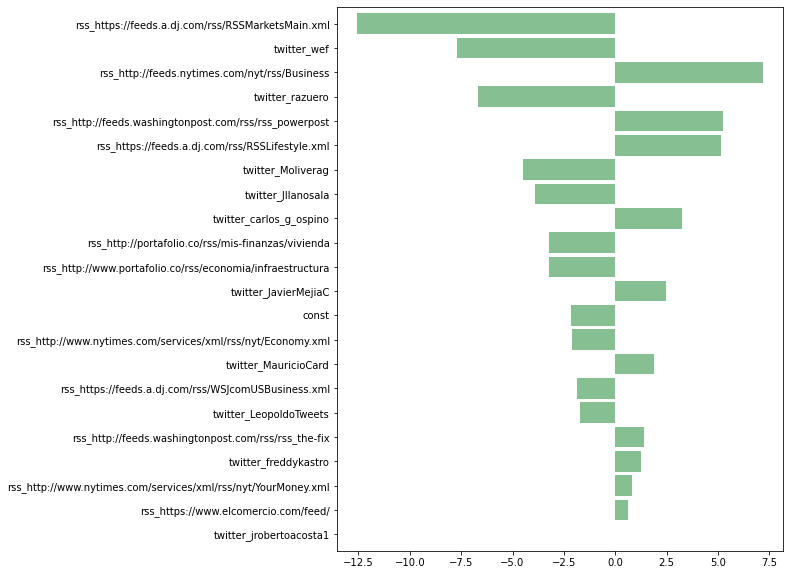

In [73]:
ax = resultados_reg['coef'].plot(kind='barh', figsize=(8, 10), color='#86bf91', zorder=2, width=0.85)

In [74]:
## validación con otro conjunto de variables

In [75]:
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_train_f, y_train, test_size = p_test, random_state = 86, shuffle= True)

In [76]:
X_train_lm_r = sm.add_constant(X_train_r)
lr_1_r = sm.OLS(y_train_r, X_train_lm_r).fit()
lr_1_r.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Diferencia   R-squared:                       0.879
Model:                            OLS   Adj. R-squared:                  0.717
Method:                 Least Squares   F-statistic:                     5.435
Date:                Thu, 28 Apr 2022   Prob (F-statistic):           1.01e-05
Time:                        10:51:45   Log-Likelihood:                -110.73
No. Observations:                  64   AIC:                             295.5
Df Residuals:                      27   BIC:                             375.3
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
=================================================================================================================================
                                                                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------------------
const                                                            -2.2822      2.474     -0.922      0.365      -7.359       2.795
rss_http://www.nytimes.com/services/xml/rss/nyt/Sports.xml       -3.0731      2.650     -1.160      0.256      -8.511       2.364
rss_http://www.nytimes.com/services/xml/rss/nyt/NYRegion.xml     -1.6602      4.219     -0.394      0.697     -10.316       6.996
rss_http://feeds.washingtonpost.com/rss/rss_powerpost             7.3727      3.062      2.408      0.023       1.090      13.656
rss_http://feeds.washingtonpost.com/rss/rss_the-fix               2.9841      1.493      1.998      0.056      -0.080       6.048
rss_http://feeds.washingtonpost.com/rss/politics                 -3.2187      3.759     -0.856      0.399     -10.932       4.495
rss_http://portafolio.co/rss/mis-finanzas/vivienda               -3.2384      1.216     -2.663      0.013      -5.734      -0.743
rss_http://www.nytimes.com/services/xml/rss/nyt/Economy.xml      -3.0824      1.603     -1.923      0.065      -6.371       0.207
rss_http://www.nytimes.com/services/xml/rss/nyt/YourMoney.xml     0.9955      1.536      0.648      0.523      -2.157       4.148
rss_http://portafolio.co/rss/negocios/inversion                  -0.8308      1.551     -0.536      0.597      -4.013       2.352
rss_http://feeds.nytimes.com/nyt/rss/Business                     8.5946      3.548      2.422      0.022       1.315      15.874
rss_https://www.elcomercio.com/feed/                              0.5999      1.632      0.368      0.716      -2.749       3.949
twitter_Fondosdepension                                          -1.6559      1.787     -0.927      0.362      -5.322       2.011
twitter_BancoRepublica                                           -0.2043      2.728     -0.075      0.941      -5.801       5.392
rss_https://feeds.a.dj.com/rss/RSSMarketsMain.xml               -12.6443      3.403     -3.716      0.001     -19.626      -5.663
twitter_Jllanosala                                               -4.1936      1.214     -3.455      0.002      -6.684      -1.703
twitter_LeopoldoTweets                                           -2.2420      0.887     -2.526      0.018      -4.063      -0.421
rss_https://feeds.a.dj.com/rss/WSJcomUSBusiness.xml              -2.1504      5.689     -0.378      0.708     -13.824       9.523
twitter_Fedesarrollo                                              0.1614      0.963      0.168      0.868      -1.814       2.137
rss_http://www.portafolio.co/rss/economia/infraestructura        -3.4438      1.103     -3.122      0.004      -5.707      -1.180
rss_http://www.portafolio.co/rss/economia/impuestos               0.5890      1.748      0.33

In [77]:
X_test_lm_r = sm.add_constant(X_test_r)
ypred = lr_1_r.predict(X_test_lm_r)
ypred

date
2022-03-25    2.919178
2022-04-08   -4.557491
2022-02-15    2.724889
2022-02-28   -4.288348
2022-03-04   -2.846359
2022-03-10    1.034550
2022-02-23    3.972610
2022-01-26   -0.671401
dtype: float64

In [78]:
RMSE=mean_squared_error(y_test_r,ypred, squared=False)
RMSE2=mean_squared_error(y_test_r,ypred, squared=True)
MAPE=mean_absolute_percentage_error(y_test_r,ypred) 
print("RMSE:",RMSE," ","MAPE:",MAPE)

RMSE: 4.600041032146605   MAPE: 1.5286214564865461


### XGBOOST

In [79]:
import xgboost as xgb

C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\xgboost\compat.py:31: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [80]:
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_train_f, y_train, test_size = p_test, random_state = 86, shuffle= True)

In [81]:
modelo_trm=xgb.XGBRegressor(max_depth=80, verbosity= 0, subsample=0.5,  n_estimators=472, n_jobs=-1, objective='reg:squarederror', booster='gbtree', random_state=42, learning_rate=0.04, reg_lambda=1)

#### Variables finales antes final

In [82]:
modelo_trm=modelo_trm.fit(X_train_r, y_train_r, eval_set=[(X_train_r, y_train_r), (X_test_r, y_test_r)])

[0]	validation_0-rmse:3.91635	validation_1-rmse:4.89258


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\xgboost\data.py:208: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[1]	validation_0-rmse:3.81668	validation_1-rmse:4.77745
[2]	validation_0-rmse:3.75204	validation_1-rmse:4.83735
[3]	validation_0-rmse:3.71395	validation_1-rmse:4.80994
[4]	validation_0-rmse:3.68486	validation_1-rmse:4.83810
[5]	validation_0-rmse:3.62264	validation_1-rmse:4.89179
[6]	validation_0-rmse:3.58023	validation_1-rmse:4.91098
[7]	validation_0-rmse:3.53840	validation_1-rmse:4.91704
[8]	validation_0-rmse:3.50271	validation_1-rmse:4.85903
[9]	validation_0-rmse:3.48156	validation_1-rmse:4.80139
[10]	validation_0-rmse:3.44177	validation_1-rmse:4.80442
[11]	validation_0-rmse:3.41412	validation_1-rmse:4.81337
[12]	validation_0-rmse:3.38769	validation_1-rmse:4.81671
[13]	validation_0-rmse:3.35588	validation_1-rmse:4.81089
[14]	validation_0-rmse:3.29911	validation_1-rmse:4.80656
[15]	validation_0-rmse:3.24882	validation_1-rmse:4.79589
[16]	validation_0-rmse:3.20253	validation_1-rmse:4.78157
[17]	validation_0-rmse:3.18570	validation_1-rmse:4.77390
[18]	validation_0-rmse:3.16244	validatio

[145]	validation_0-rmse:0.83227	validation_1-rmse:5.65915
[146]	validation_0-rmse:0.82362	validation_1-rmse:5.67611
[147]	validation_0-rmse:0.81156	validation_1-rmse:5.69938
[148]	validation_0-rmse:0.80287	validation_1-rmse:5.70115
[149]	validation_0-rmse:0.78877	validation_1-rmse:5.72443
[150]	validation_0-rmse:0.78173	validation_1-rmse:5.76594
[151]	validation_0-rmse:0.77263	validation_1-rmse:5.78876
[152]	validation_0-rmse:0.76315	validation_1-rmse:5.78654
[153]	validation_0-rmse:0.74935	validation_1-rmse:5.77583
[154]	validation_0-rmse:0.74617	validation_1-rmse:5.77763
[155]	validation_0-rmse:0.74339	validation_1-rmse:5.78105
[156]	validation_0-rmse:0.74248	validation_1-rmse:5.78088
[157]	validation_0-rmse:0.73243	validation_1-rmse:5.80835
[158]	validation_0-rmse:0.73030	validation_1-rmse:5.80757
[159]	validation_0-rmse:0.72875	validation_1-rmse:5.79610
[160]	validation_0-rmse:0.71571	validation_1-rmse:5.80996
[161]	validation_0-rmse:0.70817	validation_1-rmse:5.83479
[162]	validati

[287]	validation_0-rmse:0.24418	validation_1-rmse:6.50759
[288]	validation_0-rmse:0.24389	validation_1-rmse:6.51485
[289]	validation_0-rmse:0.24045	validation_1-rmse:6.52098
[290]	validation_0-rmse:0.23726	validation_1-rmse:6.51883
[291]	validation_0-rmse:0.23386	validation_1-rmse:6.51613
[292]	validation_0-rmse:0.23236	validation_1-rmse:6.51100
[293]	validation_0-rmse:0.23134	validation_1-rmse:6.51565
[294]	validation_0-rmse:0.22950	validation_1-rmse:6.52071
[295]	validation_0-rmse:0.22779	validation_1-rmse:6.52020
[296]	validation_0-rmse:0.22387	validation_1-rmse:6.51798
[297]	validation_0-rmse:0.22053	validation_1-rmse:6.52041
[298]	validation_0-rmse:0.21941	validation_1-rmse:6.52794
[299]	validation_0-rmse:0.21862	validation_1-rmse:6.53891
[300]	validation_0-rmse:0.21723	validation_1-rmse:6.54007
[301]	validation_0-rmse:0.21740	validation_1-rmse:6.53668
[302]	validation_0-rmse:0.21474	validation_1-rmse:6.54710
[303]	validation_0-rmse:0.21273	validation_1-rmse:6.54551
[304]	validati

[429]	validation_0-rmse:0.07349	validation_1-rmse:6.68593
[430]	validation_0-rmse:0.07276	validation_1-rmse:6.68519
[431]	validation_0-rmse:0.07198	validation_1-rmse:6.68417
[432]	validation_0-rmse:0.07107	validation_1-rmse:6.68579
[433]	validation_0-rmse:0.07055	validation_1-rmse:6.68567
[434]	validation_0-rmse:0.06923	validation_1-rmse:6.68756
[435]	validation_0-rmse:0.06841	validation_1-rmse:6.68698
[436]	validation_0-rmse:0.06828	validation_1-rmse:6.68924
[437]	validation_0-rmse:0.06821	validation_1-rmse:6.68894
[438]	validation_0-rmse:0.06733	validation_1-rmse:6.69167
[439]	validation_0-rmse:0.06699	validation_1-rmse:6.69182
[440]	validation_0-rmse:0.06626	validation_1-rmse:6.69112
[441]	validation_0-rmse:0.06558	validation_1-rmse:6.69052
[442]	validation_0-rmse:0.06447	validation_1-rmse:6.69197
[443]	validation_0-rmse:0.06397	validation_1-rmse:6.69199
[444]	validation_0-rmse:0.06382	validation_1-rmse:6.69160
[445]	validation_0-rmse:0.06385	validation_1-rmse:6.69132
[446]	validati

In [83]:
ypred=modelo_trm.predict(X_test_r)
ypred

array([ 4.1148734, -1.1169415,  1.8061665, -2.2410903, 11.167145 ,
       -0.9006277,  1.5976446, -1.674631 ], dtype=float32)

In [84]:
RMSE=mean_squared_error(y_test_r,ypred, squared=False)
RMSE2=mean_squared_error(y_test_r,ypred, squared=True)
MAPE=mean_absolute_percentage_error(y_test_r,ypred) 
print("RMSE:",RMSE," ","MAPE:",MAPE)

RMSE: 6.7072258742254185   MAPE: 1.662605469649956


### Variables  final

In [85]:
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_train_cf, y_train, test_size = p_test, random_state = 86, shuffle= True)

In [86]:
modelo_trm=xgb.XGBRegressor(max_depth=80, verbosity= 0, subsample=0.5,  n_estimators=472, n_jobs=-1, objective='reg:squarederror', booster='gbtree', random_state=42, learning_rate=0.04, reg_lambda=1)
modelo_trm=modelo_trm.fit(X_train_r, y_train_r, eval_set=[(X_train_r, y_train_r), (X_test_r, y_test_r)])

[0]	validation_0-rmse:3.92313	validation_1-rmse:4.91953
[1]	validation_0-rmse:3.82697	validation_1-rmse:4.91773
[2]	validation_0-rmse:3.76007	validation_1-rmse:4.96931
[3]	validation_0-rmse:3.73446	validation_1-rmse:4.93000
[4]	validation_0-rmse:3.69535	validation_1-rmse:4.95266
[5]	validation_0-rmse:3.65049	validation_1-rmse:4.99249
[6]	validation_0-rmse:3.60719	validation_1-rmse:4.98996
[7]	validation_0-rmse:3.55491	validation_1-rmse:4.95673
[8]	validation_0-rmse:3.51792	validation_1-rmse:4.89357
[9]	validation_0-rmse:3.48794	validation_1-rmse:4.86936
[10]	validation_0-rmse:3.44560	validation_1-rmse:4.83537
[11]	validation_0-rmse:3.41690	validation_1-rmse:4.83853
[12]	validation_0-rmse:3.38307	validation_1-rmse:4.78966
[13]	validation_0-rmse:3.35840	validation_1-rmse:4.77049
[14]	validation_0-rmse:3.30427	validation_1-rmse:4.76937
[15]	validation_0-rmse:3.25568	validation_1-rmse:4.89330
[16]	validation_0-rmse:3.20728	validation_1-rmse:4.87238
[17]	validation_0-rmse:3.19853	validation

C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\xgboost\data.py:208: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[76]	validation_0-rmse:1.65080	validation_1-rmse:5.53056
[77]	validation_0-rmse:1.65035	validation_1-rmse:5.52026
[78]	validation_0-rmse:1.63616	validation_1-rmse:5.48862
[79]	validation_0-rmse:1.60929	validation_1-rmse:5.54826
[80]	validation_0-rmse:1.58197	validation_1-rmse:5.60221
[81]	validation_0-rmse:1.57327	validation_1-rmse:5.59995
[82]	validation_0-rmse:1.55622	validation_1-rmse:5.64112
[83]	validation_0-rmse:1.54802	validation_1-rmse:5.63144
[84]	validation_0-rmse:1.51592	validation_1-rmse:5.66131
[85]	validation_0-rmse:1.50303	validation_1-rmse:5.67284
[86]	validation_0-rmse:1.49024	validation_1-rmse:5.66561
[87]	validation_0-rmse:1.46720	validation_1-rmse:5.70237
[88]	validation_0-rmse:1.44759	validation_1-rmse:5.72063
[89]	validation_0-rmse:1.43371	validation_1-rmse:5.75591
[90]	validation_0-rmse:1.42505	validation_1-rmse:5.76573
[91]	validation_0-rmse:1.41338	validation_1-rmse:5.76893
[92]	validation_0-rmse:1.39464	validation_1-rmse:5.80830
[93]	validation_0-rmse:1.37302	

[218]	validation_0-rmse:0.46299	validation_1-rmse:6.96820
[219]	validation_0-rmse:0.45974	validation_1-rmse:6.98269
[220]	validation_0-rmse:0.45554	validation_1-rmse:7.00723
[221]	validation_0-rmse:0.45198	validation_1-rmse:7.01747
[222]	validation_0-rmse:0.44825	validation_1-rmse:7.01202
[223]	validation_0-rmse:0.44779	validation_1-rmse:7.00481
[224]	validation_0-rmse:0.44380	validation_1-rmse:7.01246
[225]	validation_0-rmse:0.44294	validation_1-rmse:7.01111
[226]	validation_0-rmse:0.43930	validation_1-rmse:7.02418
[227]	validation_0-rmse:0.43412	validation_1-rmse:7.02545
[228]	validation_0-rmse:0.43238	validation_1-rmse:7.02590
[229]	validation_0-rmse:0.42951	validation_1-rmse:7.02402
[230]	validation_0-rmse:0.42609	validation_1-rmse:7.03377
[231]	validation_0-rmse:0.42276	validation_1-rmse:7.04460
[232]	validation_0-rmse:0.42175	validation_1-rmse:7.04337
[233]	validation_0-rmse:0.41986	validation_1-rmse:7.04255
[234]	validation_0-rmse:0.41570	validation_1-rmse:7.05258
[235]	validati

[360]	validation_0-rmse:0.17106	validation_1-rmse:7.45534
[361]	validation_0-rmse:0.17066	validation_1-rmse:7.45948
[362]	validation_0-rmse:0.17017	validation_1-rmse:7.45882
[363]	validation_0-rmse:0.16986	validation_1-rmse:7.46468
[364]	validation_0-rmse:0.16854	validation_1-rmse:7.46375
[365]	validation_0-rmse:0.16823	validation_1-rmse:7.46756
[366]	validation_0-rmse:0.16785	validation_1-rmse:7.47138
[367]	validation_0-rmse:0.16761	validation_1-rmse:7.47658
[368]	validation_0-rmse:0.16439	validation_1-rmse:7.48189
[369]	validation_0-rmse:0.16132	validation_1-rmse:7.48663
[370]	validation_0-rmse:0.16126	validation_1-rmse:7.48248
[371]	validation_0-rmse:0.16106	validation_1-rmse:7.48278
[372]	validation_0-rmse:0.15954	validation_1-rmse:7.48419
[373]	validation_0-rmse:0.15966	validation_1-rmse:7.48819
[374]	validation_0-rmse:0.15951	validation_1-rmse:7.48419
[375]	validation_0-rmse:0.15927	validation_1-rmse:7.48449
[376]	validation_0-rmse:0.15890	validation_1-rmse:7.48016
[377]	validati

In [87]:
ypred=modelo_trm.predict(X_test_r)
ypred

array([ 4.3107867 , -2.094608  ,  2.0191786 , -2.9215462 , 13.753981  ,
       -0.73345256,  2.502869  , -1.3098619 ], dtype=float32)

In [88]:
RMSE=mean_squared_error(y_test_r,ypred, squared=False)
RMSE2=mean_squared_error(y_test_r,ypred, squared=True)
MAPE=mean_absolute_percentage_error(y_test_r,ypred) 
print("RMSE:",RMSE," ","MAPE:",MAPE)

RMSE: 7.576165298115565   MAPE: 1.7496682289886616


In [89]:
## Todas las variables

In [90]:
## DEFINITIVO

In [91]:
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_train, y_train, test_size = p_test, random_state = 86, shuffle= True)

In [92]:
modelo_trm=xgb.XGBRegressor(max_depth=80, verbosity= 0, subsample=0.5,  n_estimators=472, n_jobs=-1, objective='reg:squarederror', booster='gbtree', random_state=42, learning_rate=0.04, reg_lambda=1)
modelo_trm=modelo_trm.fit(X_train_r, y_train_r, eval_set=[(X_train_r, y_train_r), (X_test_r, y_test_r)])

[0]	validation_0-rmse:3.91146	validation_1-rmse:4.89438
[1]	validation_0-rmse:3.82529	validation_1-rmse:4.83498
[2]	validation_0-rmse:3.75773	validation_1-rmse:4.79320
[3]	validation_0-rmse:3.74507	validation_1-rmse:4.80372
[4]	validation_0-rmse:3.69509	validation_1-rmse:4.78495
[5]	validation_0-rmse:3.62838	validation_1-rmse:4.75438
[6]	validation_0-rmse:3.59813	validation_1-rmse:4.84762
[7]	validation_0-rmse:3.54501	validation_1-rmse:4.87896
[8]	validation_0-rmse:3.50165	validation_1-rmse:4.78683
[9]	validation_0-rmse:3.47601	validation_1-rmse:4.75623
[10]	validation_0-rmse:3.43800	validation_1-rmse:4.83082
[11]	validation_0-rmse:3.41533	validation_1-rmse:4.83643
[12]	validation_0-rmse:3.38977	validation_1-rmse:4.81998
[13]	validation_0-rmse:3.35997	validation_1-rmse:4.80212
[14]	validation_0-rmse:3.30630	validation_1-rmse:4.79608
[15]	validation_0-rmse:3.24695	validation_1-rmse:4.80721
[16]	validation_0-rmse:3.19534	validation_1-rmse:4.79003
[17]	validation_0-rmse:3.17009	validation

C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\xgboost\data.py:208: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[43]	validation_0-rmse:2.33358	validation_1-rmse:4.45281
[44]	validation_0-rmse:2.32499	validation_1-rmse:4.43942
[45]	validation_0-rmse:2.28149	validation_1-rmse:4.46788
[46]	validation_0-rmse:2.25286	validation_1-rmse:4.43176
[47]	validation_0-rmse:2.21496	validation_1-rmse:4.40099
[48]	validation_0-rmse:2.20866	validation_1-rmse:4.37298
[49]	validation_0-rmse:2.16457	validation_1-rmse:4.38977
[50]	validation_0-rmse:2.15647	validation_1-rmse:4.36716
[51]	validation_0-rmse:2.14697	validation_1-rmse:4.35972
[52]	validation_0-rmse:2.14437	validation_1-rmse:4.32471
[53]	validation_0-rmse:2.13674	validation_1-rmse:4.30875
[54]	validation_0-rmse:2.10339	validation_1-rmse:4.30454
[55]	validation_0-rmse:2.07475	validation_1-rmse:4.29297
[56]	validation_0-rmse:2.05485	validation_1-rmse:4.29016
[57]	validation_0-rmse:2.02123	validation_1-rmse:4.25948
[58]	validation_0-rmse:1.99036	validation_1-rmse:4.29405
[59]	validation_0-rmse:1.94605	validation_1-rmse:4.27261
[60]	validation_0-rmse:1.91078	

[186]	validation_0-rmse:0.56130	validation_1-rmse:4.16430
[187]	validation_0-rmse:0.55873	validation_1-rmse:4.16274
[188]	validation_0-rmse:0.55020	validation_1-rmse:4.15920
[189]	validation_0-rmse:0.54969	validation_1-rmse:4.15660
[190]	validation_0-rmse:0.54110	validation_1-rmse:4.16171
[191]	validation_0-rmse:0.53343	validation_1-rmse:4.16364
[192]	validation_0-rmse:0.53222	validation_1-rmse:4.16844
[193]	validation_0-rmse:0.53008	validation_1-rmse:4.17283
[194]	validation_0-rmse:0.52849	validation_1-rmse:4.17763
[195]	validation_0-rmse:0.52570	validation_1-rmse:4.18505
[196]	validation_0-rmse:0.52422	validation_1-rmse:4.18564
[197]	validation_0-rmse:0.51563	validation_1-rmse:4.18586
[198]	validation_0-rmse:0.51532	validation_1-rmse:4.19088
[199]	validation_0-rmse:0.51398	validation_1-rmse:4.19539
[200]	validation_0-rmse:0.51194	validation_1-rmse:4.19424
[201]	validation_0-rmse:0.50361	validation_1-rmse:4.19329
[202]	validation_0-rmse:0.50319	validation_1-rmse:4.19101
[203]	validati

[328]	validation_0-rmse:0.14439	validation_1-rmse:4.21764
[329]	validation_0-rmse:0.14317	validation_1-rmse:4.21708
[330]	validation_0-rmse:0.14076	validation_1-rmse:4.21691
[331]	validation_0-rmse:0.13827	validation_1-rmse:4.21664
[332]	validation_0-rmse:0.13815	validation_1-rmse:4.21638
[333]	validation_0-rmse:0.13744	validation_1-rmse:4.21767
[334]	validation_0-rmse:0.13694	validation_1-rmse:4.21770
[335]	validation_0-rmse:0.13461	validation_1-rmse:4.21779
[336]	validation_0-rmse:0.13378	validation_1-rmse:4.21791
[337]	validation_0-rmse:0.13332	validation_1-rmse:4.21813
[338]	validation_0-rmse:0.13096	validation_1-rmse:4.21871
[339]	validation_0-rmse:0.13014	validation_1-rmse:4.21992
[340]	validation_0-rmse:0.12775	validation_1-rmse:4.22037
[341]	validation_0-rmse:0.12706	validation_1-rmse:4.21985
[342]	validation_0-rmse:0.12628	validation_1-rmse:4.21833
[343]	validation_0-rmse:0.12385	validation_1-rmse:4.21961
[344]	validation_0-rmse:0.12231	validation_1-rmse:4.21948
[345]	validati

[470]	validation_0-rmse:0.03661	validation_1-rmse:4.22384
[471]	validation_0-rmse:0.03592	validation_1-rmse:4.22391


In [93]:
ypred=modelo_trm.predict(X_test_r)
ypred

array([ 2.319867  , -1.2681106 ,  1.1906939 , -4.2493057 , -0.05919924,
        2.4776397 , -1.2608798 , -2.8160198 ], dtype=float32)

In [94]:
RMSE=mean_squared_error(y_test_r,ypred, squared=False)
RMSE2=mean_squared_error(y_test_r,ypred, squared=True)
MAPE=mean_absolute_percentage_error(y_test_r,ypred) 
print("RMSE:",RMSE," ","MAPE:",MAPE)

RMSE: 4.223911973644003   MAPE: 1.528082424792226


In [95]:
fs=modelo_trm.get_booster().get_fscore()
fs=pd.DataFrame.from_dict(fs, orient='index').sort_values(0,ascending=False)
fs.columns=['score']
fs

,score
rss_http://elnacional.com.do/feed/,708
rss_http://ep00.epimg.net/rss/economia/portada.xml,387
rss_http://feeds.washingtonpost.com/rss/national/energy-environment,375
rss_http://feeds.nytimes.com/nyt/rss/Technology,280
rss_http://portafolio.co/rss/mis-finanzas,251
...,...
twitter_bbcmundo,2
rss_https://www.eltiempo.com/rss/mundo_eeuu-y-canada.xml,1
twitter_RevistaSemana,1
twitter_lafm,1


In [96]:
fs.describe()

,score
count,160.000000
mean,37.206250
std,77.878239
min,1.000000
25%,6.750000
50%,16.000000
75%,33.000000
max,708.000000


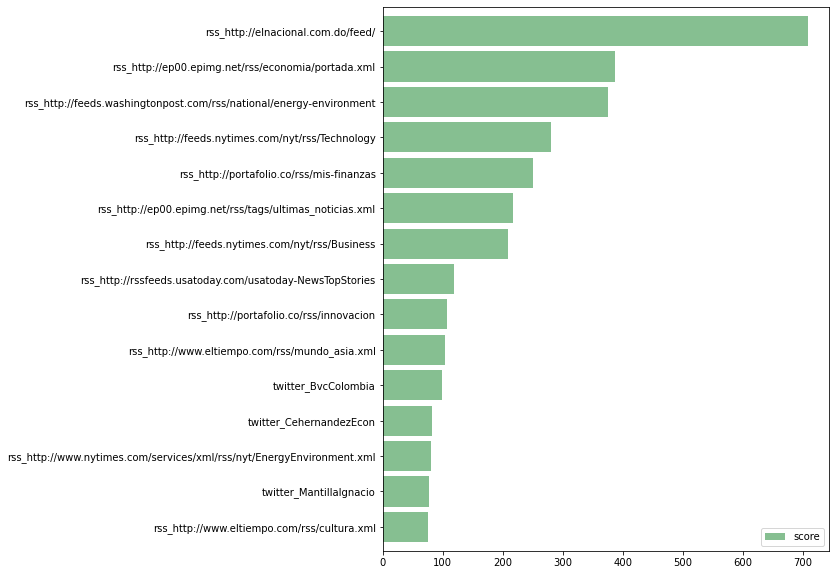

In [97]:
ax = fs.head(15).sort_values('score').plot(kind='barh', figsize=(8, 10), color='#86bf91', zorder=2, width=0.85)

In [98]:
seleccionColumnas_xgb=fs.head(30).index.values

In [99]:
seleccionColumnas_xgb

array(['rss_http://elnacional.com.do/feed/',
       'rss_http://ep00.epimg.net/rss/economia/portada.xml',
       'rss_http://feeds.washingtonpost.com/rss/national/energy-environment',
       'rss_http://feeds.nytimes.com/nyt/rss/Technology',
       'rss_http://portafolio.co/rss/mis-finanzas',
       'rss_http://ep00.epimg.net/rss/tags/ultimas_noticias.xml',
       'rss_http://feeds.nytimes.com/nyt/rss/Business',
       'rss_http://rssfeeds.usatoday.com/usatoday-NewsTopStories',
       'rss_http://portafolio.co/rss/innovacion',
       'rss_http://www.eltiempo.com/rss/mundo_asia.xml',
       'twitter_BvcColombia', 'twitter_CehernandezEcon',
       'rss_http://www.nytimes.com/services/xml/rss/nyt/EnergyEnvironment.xml',
       'twitter_MantillaIgnacio',
       'rss_http://www.eltiempo.com/rss/cultura.xml',
       'twitter_MinHacienda',
       'rss_http://www.eltiempo.com/rss/economia_sector-financiero.xml',
       'twitter_freddykastro', 'twitter_Jllanosala',
       'rss_http://feeds.wash

In [100]:
### modelo con variables seleccionadas

In [101]:
X_train_cf_xgb=X_train[seleccionColumnas_xgb]

In [102]:
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_train_cf_xgb, y_train, test_size = p_test, random_state = 86, shuffle= True)

In [103]:
modelo_trm_xgb=xgb.XGBRegressor(max_depth=80, verbosity= 0, subsample=0.5,  n_estimators=472, n_jobs=-1, objective='reg:squarederror', booster='gbtree', random_state=42, learning_rate=0.04, reg_lambda=1)
modelo_trm_xgb=modelo_trm.fit(X_train_r, y_train_r, eval_set=[(X_train_r, y_train_r), (X_test_r, y_test_r)])

[0]	validation_0-rmse:3.92146	validation_1-rmse:4.92092
[1]	validation_0-rmse:3.85543	validation_1-rmse:4.95681
[2]	validation_0-rmse:3.78222	validation_1-rmse:4.87531
[3]	validation_0-rmse:3.75012	validation_1-rmse:4.85055
[4]	validation_0-rmse:3.72210	validation_1-rmse:4.87112
[5]	validation_0-rmse:3.65340	validation_1-rmse:4.82612
[6]	validation_0-rmse:3.62039	validation_1-rmse:4.88984
[7]	validation_0-rmse:3.58510	validation_1-rmse:4.88831
[8]	validation_0-rmse:3.54664	validation_1-rmse:4.80682
[9]	validation_0-rmse:3.51596	validation_1-rmse:4.79934
[10]	validation_0-rmse:3.48000	validation_1-rmse:4.79080
[11]	validation_0-rmse:3.46935	validation_1-rmse:4.80321
[12]	validation_0-rmse:3.43987	validation_1-rmse:4.78555
[13]	validation_0-rmse:3.41234	validation_1-rmse:4.82893
[14]	validation_0-rmse:3.37190	validation_1-rmse:4.80906
[15]	validation_0-rmse:3.30562	validation_1-rmse:4.78559
[16]	validation_0-rmse:3.26639	validation_1-rmse:4.73766
[17]	validation_0-rmse:3.24014	validation

C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\xgboost\data.py:208: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[46]	validation_0-rmse:2.38405	validation_1-rmse:4.62990
[47]	validation_0-rmse:2.35316	validation_1-rmse:4.59917
[48]	validation_0-rmse:2.35510	validation_1-rmse:4.58121
[49]	validation_0-rmse:2.30611	validation_1-rmse:4.59753
[50]	validation_0-rmse:2.28686	validation_1-rmse:4.60761
[51]	validation_0-rmse:2.26839	validation_1-rmse:4.61006
[52]	validation_0-rmse:2.25112	validation_1-rmse:4.61178
[53]	validation_0-rmse:2.24192	validation_1-rmse:4.58808
[54]	validation_0-rmse:2.20240	validation_1-rmse:4.56358
[55]	validation_0-rmse:2.17811	validation_1-rmse:4.56361
[56]	validation_0-rmse:2.14567	validation_1-rmse:4.53696
[57]	validation_0-rmse:2.11190	validation_1-rmse:4.48573
[58]	validation_0-rmse:2.08539	validation_1-rmse:4.47944
[59]	validation_0-rmse:2.04212	validation_1-rmse:4.46392
[60]	validation_0-rmse:2.01324	validation_1-rmse:4.47027
[61]	validation_0-rmse:1.99486	validation_1-rmse:4.46624
[62]	validation_0-rmse:1.97147	validation_1-rmse:4.45665
[63]	validation_0-rmse:1.94758	

[189]	validation_0-rmse:0.55181	validation_1-rmse:4.49264
[190]	validation_0-rmse:0.54311	validation_1-rmse:4.48952
[191]	validation_0-rmse:0.53547	validation_1-rmse:4.49196
[192]	validation_0-rmse:0.53371	validation_1-rmse:4.48572
[193]	validation_0-rmse:0.52994	validation_1-rmse:4.48737
[194]	validation_0-rmse:0.52953	validation_1-rmse:4.48350
[195]	validation_0-rmse:0.52658	validation_1-rmse:4.48231
[196]	validation_0-rmse:0.52330	validation_1-rmse:4.48102
[197]	validation_0-rmse:0.51503	validation_1-rmse:4.48146
[198]	validation_0-rmse:0.51281	validation_1-rmse:4.47958
[199]	validation_0-rmse:0.50957	validation_1-rmse:4.47466
[200]	validation_0-rmse:0.50846	validation_1-rmse:4.47746
[201]	validation_0-rmse:0.50066	validation_1-rmse:4.47730
[202]	validation_0-rmse:0.49863	validation_1-rmse:4.47663
[203]	validation_0-rmse:0.49061	validation_1-rmse:4.47572
[204]	validation_0-rmse:0.48208	validation_1-rmse:4.47813
[205]	validation_0-rmse:0.47381	validation_1-rmse:4.47550
[206]	validati

[331]	validation_0-rmse:0.12885	validation_1-rmse:4.51593
[332]	validation_0-rmse:0.12837	validation_1-rmse:4.51575
[333]	validation_0-rmse:0.12790	validation_1-rmse:4.51633
[334]	validation_0-rmse:0.12734	validation_1-rmse:4.51623
[335]	validation_0-rmse:0.12612	validation_1-rmse:4.51598
[336]	validation_0-rmse:0.12531	validation_1-rmse:4.51636
[337]	validation_0-rmse:0.12498	validation_1-rmse:4.51693
[338]	validation_0-rmse:0.12339	validation_1-rmse:4.51754
[339]	validation_0-rmse:0.12264	validation_1-rmse:4.51880
[340]	validation_0-rmse:0.12098	validation_1-rmse:4.51839
[341]	validation_0-rmse:0.11973	validation_1-rmse:4.51889
[342]	validation_0-rmse:0.11785	validation_1-rmse:4.51865
[343]	validation_0-rmse:0.11582	validation_1-rmse:4.51980
[344]	validation_0-rmse:0.11394	validation_1-rmse:4.51953
[345]	validation_0-rmse:0.11171	validation_1-rmse:4.52091
[346]	validation_0-rmse:0.11122	validation_1-rmse:4.52100
[347]	validation_0-rmse:0.11099	validation_1-rmse:4.52152
[348]	validati

In [104]:
ypred=modelo_trm.predict(X_test_r)
ypred

array([ 1.8613052, -1.0190283, -0.5387971, -2.8299675,  0.6465341,
        2.7747672, -1.1665723, -1.2396452], dtype=float32)

In [105]:
RMSE=mean_squared_error(y_test_r,ypred, squared=False)
RMSE2=mean_squared_error(y_test_r,ypred, squared=True)
MAPE=mean_absolute_percentage_error(y_test_r,ypred) 
print("RMSE:",RMSE," ","MAPE:",MAPE)

RMSE: 4.529094358628907   MAPE: 1.3705250521985843


In [106]:
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_train_f, y_train, test_size = p_test, random_state = 86, shuffle= True)

In [107]:
modelo_trm_xgb=xgb.XGBRegressor(max_depth=80, verbosity= 0, subsample=0.5,  n_estimators=472, n_jobs=-1, objective='reg:squarederror', booster='gbtree', random_state=42, learning_rate=0.04, reg_lambda=1)
modelo_trm_xgb=modelo_trm.fit(X_train_r, y_train_r, eval_set=[(X_train_r, y_train_r), (X_test_r, y_test_r)])

[0]	validation_0-rmse:3.91635	validation_1-rmse:4.89258
[1]	validation_0-rmse:3.81668	validation_1-rmse:4.77745
[2]	validation_0-rmse:3.75204	validation_1-rmse:4.83735
[3]	validation_0-rmse:3.71395	validation_1-rmse:4.80994
[4]	validation_0-rmse:3.68486	validation_1-rmse:4.83810
[5]	validation_0-rmse:3.62264	validation_1-rmse:4.89179
[6]	validation_0-rmse:3.58023	validation_1-rmse:4.91098
[7]	validation_0-rmse:3.53840	validation_1-rmse:4.91704
[8]	validation_0-rmse:3.50271	validation_1-rmse:4.85903
[9]	validation_0-rmse:3.48156	validation_1-rmse:4.80139
[10]	validation_0-rmse:3.44177	validation_1-rmse:4.80442
[11]	validation_0-rmse:3.41412	validation_1-rmse:4.81337
[12]	validation_0-rmse:3.38769	validation_1-rmse:4.81671
[13]	validation_0-rmse:3.35588	validation_1-rmse:4.81089
[14]	validation_0-rmse:3.29911	validation_1-rmse:4.80656
[15]	validation_0-rmse:3.24882	validation_1-rmse:4.79589
[16]	validation_0-rmse:3.20253	validation_1-rmse:4.78157
[17]	validation_0-rmse:3.18570	validation

C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\xgboost\data.py:208: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[54]	validation_0-rmse:2.11815	validation_1-rmse:4.68850
[55]	validation_0-rmse:2.10590	validation_1-rmse:4.79490
[56]	validation_0-rmse:2.08675	validation_1-rmse:4.79040
[57]	validation_0-rmse:2.05804	validation_1-rmse:4.83462
[58]	validation_0-rmse:2.02595	validation_1-rmse:4.89324
[59]	validation_0-rmse:1.98834	validation_1-rmse:4.85841
[60]	validation_0-rmse:1.95706	validation_1-rmse:4.87128
[61]	validation_0-rmse:1.93386	validation_1-rmse:4.86116
[62]	validation_0-rmse:1.90537	validation_1-rmse:4.90467
[63]	validation_0-rmse:1.88399	validation_1-rmse:4.91300
[64]	validation_0-rmse:1.86990	validation_1-rmse:4.90357
[65]	validation_0-rmse:1.84178	validation_1-rmse:4.96483
[66]	validation_0-rmse:1.81725	validation_1-rmse:4.97994
[67]	validation_0-rmse:1.80688	validation_1-rmse:4.97276
[68]	validation_0-rmse:1.80587	validation_1-rmse:4.93546
[69]	validation_0-rmse:1.77901	validation_1-rmse:4.92084
[70]	validation_0-rmse:1.77418	validation_1-rmse:4.93276
[71]	validation_0-rmse:1.74941	

[197]	validation_0-rmse:0.53453	validation_1-rmse:6.05863
[198]	validation_0-rmse:0.53163	validation_1-rmse:6.05643
[199]	validation_0-rmse:0.52916	validation_1-rmse:6.05665
[200]	validation_0-rmse:0.52840	validation_1-rmse:6.05358
[201]	validation_0-rmse:0.52233	validation_1-rmse:6.05110
[202]	validation_0-rmse:0.52216	validation_1-rmse:6.05011
[203]	validation_0-rmse:0.51445	validation_1-rmse:6.06900
[204]	validation_0-rmse:0.50689	validation_1-rmse:6.08557
[205]	validation_0-rmse:0.50001	validation_1-rmse:6.10605
[206]	validation_0-rmse:0.49554	validation_1-rmse:6.12650
[207]	validation_0-rmse:0.49634	validation_1-rmse:6.13246
[208]	validation_0-rmse:0.49397	validation_1-rmse:6.13075
[209]	validation_0-rmse:0.48627	validation_1-rmse:6.14660
[210]	validation_0-rmse:0.48119	validation_1-rmse:6.14781
[211]	validation_0-rmse:0.47970	validation_1-rmse:6.14332
[212]	validation_0-rmse:0.47684	validation_1-rmse:6.14176
[213]	validation_0-rmse:0.47503	validation_1-rmse:6.14644
[214]	validati

[339]	validation_0-rmse:0.14597	validation_1-rmse:6.58110
[340]	validation_0-rmse:0.14456	validation_1-rmse:6.58428
[341]	validation_0-rmse:0.14445	validation_1-rmse:6.58285
[342]	validation_0-rmse:0.14376	validation_1-rmse:6.58695
[343]	validation_0-rmse:0.14287	validation_1-rmse:6.59178
[344]	validation_0-rmse:0.14062	validation_1-rmse:6.59603
[345]	validation_0-rmse:0.14025	validation_1-rmse:6.59852
[346]	validation_0-rmse:0.13984	validation_1-rmse:6.59736
[347]	validation_0-rmse:0.13864	validation_1-rmse:6.59704
[348]	validation_0-rmse:0.13667	validation_1-rmse:6.60282
[349]	validation_0-rmse:0.13647	validation_1-rmse:6.60224
[350]	validation_0-rmse:0.13642	validation_1-rmse:6.60327
[351]	validation_0-rmse:0.13570	validation_1-rmse:6.60412
[352]	validation_0-rmse:0.13287	validation_1-rmse:6.60640
[353]	validation_0-rmse:0.13199	validation_1-rmse:6.60558
[354]	validation_0-rmse:0.13148	validation_1-rmse:6.61174
[355]	validation_0-rmse:0.13093	validation_1-rmse:6.61629
[356]	validati

In [ ]:
## grilla total

In [182]:
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_train, y_train, test_size = p_test, random_state = 86, shuffle= True)

In [183]:
gsc = GridSearchCV(
            estimator=xgb.XGBRegressor(),
            param_grid={"learning_rate": (0.05, 0.10, 0.15, 0.3),
                        "max_depth": [ 3, 4, 5, 6, 8],
                        "min_child_weight": [ 1, 3, 5, 7],
                        "gamma":[ 0.0, 0.1, 0.2],
                        "colsample_bytree":[ 0.3, 0.4,1],},
            cv=3, scoring='neg_mean_squared_error', verbose=0, n_jobs=-1)

In [184]:
gsc.fit(X_train_r, y_train_r)

C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\xgboost\data.py:208: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=...
                                    num_parallel_tree=None, random_state=None,
                                    reg_alpha=None, reg_lambda=None,
                                    scale_pos_weight=None, subsample=None,
                                    tree_method=None, validate_parame

In [185]:
gsc.best_params_

{'colsample_bytree': 0.3,
 'gamma': 0.2,
 'learning_rate': 0.15,
 'max_depth': 3,
 'min_child_weight': 5}

In [186]:
modelo_xgb_trm = gsc.best_estimator_

In [187]:
ypred=modelo_xgb_trm.predict(X_test_r)
ypred

array([ 4.026773  , -0.94011515,  2.4628856 , -2.282031  ,  0.9669049 ,
        1.1551303 , -3.6926413 , -1.1674834 ], dtype=float32)

In [188]:
RMSE=mean_squared_error(y_test_r,ypred, squared=False)
RMSE2=mean_squared_error(y_test_r,ypred, squared=True)
MAPE=mean_absolute_percentage_error(y_test_r,ypred) 
print("RMSE:",RMSE," ","MAPE:",MAPE)

RMSE: 4.096276362820872   MAPE: 1.323511108291718


In [ ]:
### Grafico  XGBOOST

In [205]:
parameters={'colsample_bytree': 0.3,
 'gamma': 0.2,
 'learning_rate': 0.15,
 'max_depth': 3,
 'min_child_weight': 5}

In [206]:
modelo_xgb_trm=xgb.XGBRegressor(**parameters)

In [207]:
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_train, y_train, test_size = p_test, random_state = 86, shuffle= True)

In [208]:
modelo_xgb_trm.fit(X_train_r, y_train_r)

C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\xgboost\data.py:208: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.3, gamma=0.2, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.15, max_delta_step=0, max_depth=3,
             min_child_weight=5, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [209]:
ypred=modelo_xgb_trm.predict(X_test_r)
ypred

array([ 4.026773  , -0.94011515,  2.4628856 , -2.282031  ,  0.9669049 ,
        1.1551303 , -3.6926413 , -1.1674834 ], dtype=float32)

In [210]:
RMSE=mean_squared_error(y_test_r,ypred, squared=False)
RMSE2=mean_squared_error(y_test_r,ypred, squared=True)
MAPE=mean_absolute_percentage_error(y_test_r,ypred) 
print("RMSE:",RMSE," ","MAPE:",MAPE)

RMSE: 4.096276362820872   MAPE: 1.323511108291718


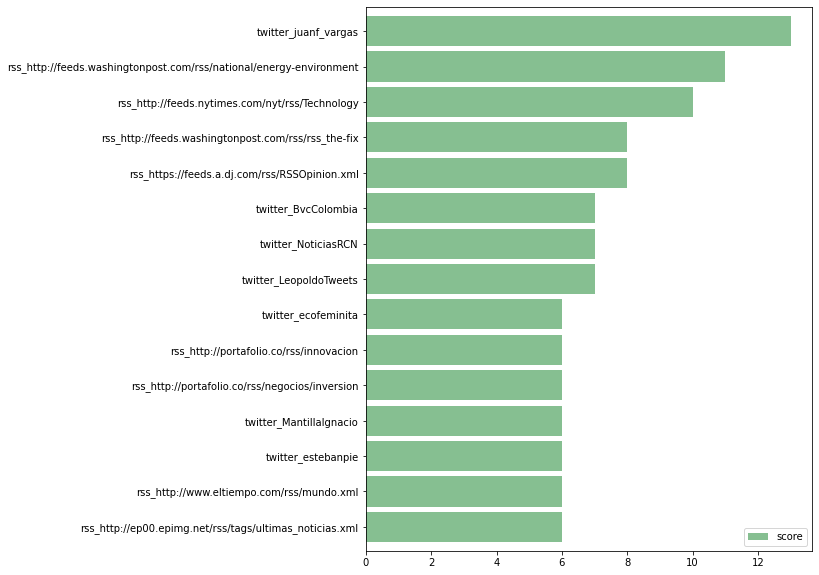

In [211]:
fs=modelo_xgb_trm.get_booster().get_fscore()
fs=pd.DataFrame.from_dict(fs, orient='index').sort_values(0,ascending=False).head(15)
fs.columns=['score']

ax = fs.sort_values('score').plot(kind='barh', figsize=(8, 10), color='#86bf91', zorder=2, width=0.85)

In [ ]:
## grilla train_cf

In [196]:
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_train, y_train, test_size = p_test, random_state = 86, shuffle= True)

In [197]:
gsc = GridSearchCV(
            estimator=xgb.XGBRegressor(),
            param_grid={"learning_rate": (0.05, 0.10, 0.15, 0.3),
                        "max_depth": [ 3, 4, 5, 6, 8],
                        "min_child_weight": [ 1, 3, 5, 7],
                        "gamma":[ 0.0, 0.1, 0.2],
                        "colsample_bytree":[ 0.3, 0.4,1],},
            cv=3, scoring='neg_mean_squared_error', verbose=0, n_jobs=-1)

In [198]:
gsc.fit(X_train_r, y_train_r)

C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\xgboost\data.py:208: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=...
                                    num_parallel_tree=None, random_state=None,
                                    reg_alpha=None, reg_lambda=None,
                                    scale_pos_weight=None, subsample=None,
                                    tree_method=None, validate_parame

In [199]:
gsc.best_params_

{'colsample_bytree': 0.3,
 'gamma': 0.2,
 'learning_rate': 0.15,
 'max_depth': 3,
 'min_child_weight': 5}

In [200]:
modelo_xgb_trm = gsc.best_estimator_

In [201]:
ypred=modelo_xgb_trm.predict(X_test_r)
ypred

array([ 4.026773  , -0.94011515,  2.4628856 , -2.282031  ,  0.9669049 ,
        1.1551303 , -3.6926413 , -1.1674834 ], dtype=float32)

In [202]:
RMSE=mean_squared_error(y_test_r,ypred, squared=False)
RMSE2=mean_squared_error(y_test_r,ypred, squared=True)
MAPE=mean_absolute_percentage_error(y_test_r,ypred) 
print("RMSE:",RMSE," ","MAPE:",MAPE)

RMSE: 4.096276362820872   MAPE: 1.323511108291718


# LGBM

In [108]:
from lightgbm import LGBMRegressor

In [109]:
#codificacion columnas

In [110]:
maestro_columnas=pd.DataFrame(X_train_cf.columns.values).reset_index()
maestro_columnas.columns=['cod','id']
maestro_columnas['cod']='cod_'+maestro_columnas['cod'].astype(str)
maestro_columnas

,cod,id
0,cod_0,rss_http://feeds.washingtonpost.com/rss/rss_powerpost
1,cod_1,rss_http://feeds.washingtonpost.com/rss/rss_the-fix
2,cod_2,rss_http://portafolio.co/rss/mis-finanzas/vivienda
3,cod_3,rss_http://www.nytimes.com/services/xml/rss/nyt/Economy.xml
4,cod_4,rss_http://www.nytimes.com/services/xml/rss/nyt/YourMoney.xml
5,cod_5,rss_http://feeds.nytimes.com/nyt/rss/Business
6,cod_6,rss_https://www.elcomercio.com/feed/
7,cod_7,rss_https://feeds.a.dj.com/rss/RSSMarketsMain.xml
8,cod_8,twitter_Jllanosala
9,cod_9,twitter_LeopoldoTweets


In [111]:
X_train_cf_lgbm=X_train_cf.copy()
X_train_cf_lgbm.columns=maestro_columnas['cod'].values
X_train_cf_lgbm

,cod_0,cod_1,cod_2,cod_3,cod_4,cod_5,cod_6,cod_7,cod_8,cod_9,...,cod_11,cod_12,cod_13,cod_14,cod_15,cod_16,cod_17,cod_18,cod_19,cod_20
date,,,,,,,,,,,,,,,,,,,,,
2021-12-30,0.000000,0.000000,0.0000,0.000000,0.0000,0.000000,0.000000,0.000000,-1.000000,0.0000,...,0.000000,0.0,-0.164500,0.000000,0.000000,0.000000,0.000000,-0.511000,0.000000,0.000
2021-12-31,0.000000,0.000000,0.0000,0.000000,-0.5190,0.000000,0.000000,0.000000,-0.832714,0.0000,...,0.000000,0.0,-0.864400,0.000000,0.000000,0.000000,-0.952593,-0.679667,0.043000,0.000
2022-01-03,0.000000,0.000000,0.0000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.0000,...,0.000000,0.0,0.087500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000
2022-01-04,0.000000,0.000000,-0.2700,0.000000,0.0000,0.000000,0.000000,0.000000,-1.000000,0.0000,...,0.000000,0.0,0.000000,-0.954000,0.000000,0.000000,-0.435333,0.000000,0.000000,-0.004
2022-01-05,0.000000,0.000000,0.0000,0.458800,0.0000,0.000000,0.000000,0.000000,-0.512000,0.0000,...,0.000000,0.0,-0.176500,0.000000,0.000000,0.000000,-0.955000,-0.697333,0.000000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-04,-0.071667,0.439500,0.0635,0.000000,0.0000,0.097250,-0.459571,-0.124643,-0.986000,-0.1325,...,-0.767667,0.0,0.000000,0.647000,-0.577000,0.356000,-0.697063,0.059000,-1.000000,0.000
2022-04-05,0.162500,0.304167,-0.5330,-0.206500,0.0000,-0.062000,-0.242083,-0.068667,-0.797333,-0.0040,...,0.000000,0.0,0.000000,0.000000,-0.843138,0.395250,-0.872357,-0.803667,0.214600,0.000
2022-04-06,0.104714,0.382000,0.0000,-0.257000,0.0000,0.098114,-0.584400,0.353176,-0.998875,0.4530,...,-0.254500,0.0,0.647000,0.000000,-0.678818,0.292583,-0.744933,-0.865500,0.000000,0.000


In [112]:
# DEFINITIVO  sin sintonizado

In [113]:
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_train_cf_lgbm, y_train, test_size = p_test, random_state = 86, shuffle= True)

In [114]:
modeloLgbm_trm=LGBMRegressor(metric='rmse')

In [115]:
modeloLgbm_trm=modeloLgbm_trm.fit(X_train_r, y_train_r, eval_set=[(X_train_r, y_train_r), (X_test_r, y_test_r)])

[1]	training's rmse: 3.89629	valid_1's rmse: 4.71041
[2]	training's rmse: 3.87714	valid_1's rmse: 4.65658
[3]	training's rmse: 3.84527	valid_1's rmse: 4.67946
[4]	training's rmse: 3.8118	valid_1's rmse: 4.7222
[5]	training's rmse: 3.7971	valid_1's rmse: 4.67699
[6]	training's rmse: 3.77187	valid_1's rmse: 4.70074
[7]	training's rmse: 3.74463	valid_1's rmse: 4.74092
[8]	training's rmse: 3.73229	valid_1's rmse: 4.77448
[9]	training's rmse: 3.7113	valid_1's rmse: 4.79679
[10]	training's rmse: 3.68938	valid_1's rmse: 4.83345
[11]	training's rmse: 3.66422	valid_1's rmse: 4.81628
[12]	training's rmse: 3.64466	valid_1's rmse: 4.8745
[13]	training's rmse: 3.62335	valid_1's rmse: 4.85876
[14]	training's rmse: 3.61342	valid_1's rmse: 4.87218
[15]	training's rmse: 3.59673	valid_1's rmse: 4.92728
[16]	training's rmse: 3.58748	valid_1's rmse: 4.89429
[17]	training's rmse: 3.56995	valid_1's rmse: 4.92634
[18]	training's rmse: 3.55103	valid_1's rmse: 4.92686
[19]	training's rmse: 3.54291	valid_1's rm

In [116]:
modeloLgbm_trm.score(X_train_r, y_train_r)

0.5242405047598977

In [117]:
ypred=modeloLgbm_trm.predict(X_test_r)
ypred

array([-1.34689282, -1.25107373, -0.20108358,  0.11156126, -2.74155487,
       -2.91022518,  2.52493865, -1.3923197 ])

In [118]:
RMSE=mean_squared_error(y_test_r,ypred, squared=False)
RMSE2=mean_squared_error(y_test_r,ypred, squared=True)
MAPE=mean_absolute_percentage_error(y_test_r,ypred) 
print("RMSE:",RMSE," ","MAPE:",MAPE)

RMSE: 5.085156840660433   MAPE: 1.4187833351474641


In [119]:
modeloLgbm_trm.feature_importances_

array([ 3,  0,  0, 14,  0,  3,  8,  0, 24,  7,  0, 14,  0,  8, 10, 10, 23,
       20, 14, 15,  0])

In [120]:
maestro_columnas['score']=modeloLgbm_trm.feature_importances_

In [121]:
maestro_columnas

,cod,id,score
0,cod_0,rss_http://feeds.washingtonpost.com/rss/rss_powerpost,3
1,cod_1,rss_http://feeds.washingtonpost.com/rss/rss_the-fix,0
2,cod_2,rss_http://portafolio.co/rss/mis-finanzas/vivienda,0
3,cod_3,rss_http://www.nytimes.com/services/xml/rss/nyt/Economy.xml,14
4,cod_4,rss_http://www.nytimes.com/services/xml/rss/nyt/YourMoney.xml,0
5,cod_5,rss_http://feeds.nytimes.com/nyt/rss/Business,3
6,cod_6,rss_https://www.elcomercio.com/feed/,8
7,cod_7,rss_https://feeds.a.dj.com/rss/RSSMarketsMain.xml,0
8,cod_8,twitter_Jllanosala,24
9,cod_9,twitter_LeopoldoTweets,7


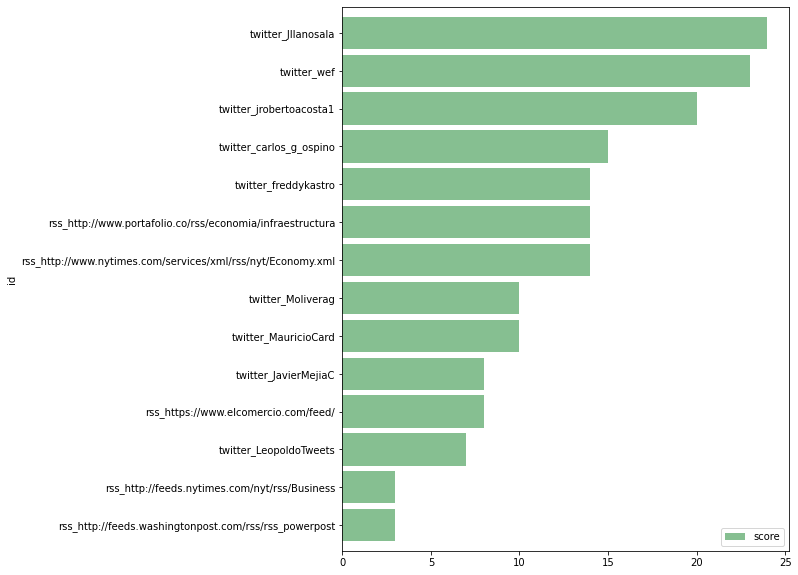

In [122]:
ax = maestro_columnas[maestro_columnas['score']>0].set_index('id').sort_values('score').plot(kind='barh', figsize=(8, 10), color='#86bf91', zorder=2, width=0.85)

In [123]:
#lgbm SINTONIZADO

In [124]:
modeloLgbm_trm=LGBMRegressor(boosting_type='gbdt', objective='regression', num_leaves=1200,
                                learning_rate=0.17, n_estimators=100, max_depth=80,
                                metric='rmse', bagging_fraction=0.8, feature_fraction=0.8, reg_lambda=0.9)

In [125]:
modeloLgbm_trm=modeloLgbm_trm.fit(X_train_r, y_train_r, eval_set=[(X_train_r, y_train_r), (X_test_r, y_test_r)])

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[1]	training's rmse: 3.88221	valid_1's rmse: 4.67123
[2]	training's rmse: 3.82921	valid_1's rmse: 4.74215
[3]	training's rmse: 3.77838	valid_1's rmse: 4.77788
[4]	training's rmse: 3.75454	valid_1's rmse: 4.70368
[5]	training's rmse: 3.72041	valid_1's rmse: 4.74279
[6]	training's rmse: 3.6995	valid_1's rmse: 4.80056
[7]	training's rmse: 3.68229	valid_1's rmse: 4.82374
[8]	training's rmse: 3.64756	valid_1's rmse: 4.8833
[9]	training's rmse: 3.61099	valid_1's rmse: 4.85611
[10]	training's rmse: 3.58191	valid_1's rmse: 4.879
[11]	training's rmse: 3.56141	valid_1's rmse: 4.89951
[12]	training's rmse: 3.54624	valid_1's rmse: 4.98142
[13]	training's rmse: 3.53061	valid_1's rmse: 4.92591
[14]	training's rmse: 3.51726	valid_1's rmse: 4.96466
[15]	training's 

In [126]:
ypred=modeloLgbm_trm.predict(X_test_r)
ypred

array([-2.48511214, -2.01071606, -1.25978655, -0.46301933, -3.00231143,
       -3.04256126,  2.52936   , -1.12199321])

In [127]:
RMSE=mean_squared_error(y_test_r,ypred, squared=False)
RMSE2=mean_squared_error(y_test_r,ypred, squared=True)
MAPE=mean_absolute_percentage_error(y_test_r,ypred) 
print("RMSE:",RMSE," ","MAPE:",MAPE)

RMSE: 5.361152572038617   MAPE: 1.5134965380909553


In [128]:
# todas las variables

In [129]:
maestro_columnas_t=pd.DataFrame(X_train.columns.values).reset_index()
maestro_columnas_t.columns=['cod','id']
maestro_columnas_t['cod']='cod_'+maestro_columnas_t['cod'].astype(str)
maestro_columnas_t

,cod,id
0,cod_0,rss_http://elnacional.com.do/feed/
1,cod_1,rss_http://ep00.epimg.net/rss/economia/portada.xml
2,cod_2,rss_http://ep00.epimg.net/rss/tags/ultimas_noticias.xml
3,cod_3,rss_http://feeds.nytimes.com/nyt/rss/Business
4,cod_4,rss_http://feeds.nytimes.com/nyt/rss/Technology
...,...,...
158,cod_158,twitter_rcnradio
159,cod_159,twitter_rodriguezbraun
160,cod_160,twitter_sergiodigra
161,cod_161,twitter_suanzes


In [130]:
X_train_t_lgbm=X_train.copy()
X_train_t_lgbm.columns=maestro_columnas_t['cod'].values
X_train_t_lgbm

,cod_0,cod_1,cod_2,cod_3,cod_4,cod_5,cod_6,cod_7,cod_8,cod_9,...,cod_153,cod_154,cod_155,cod_156,cod_157,cod_158,cod_159,cod_160,cod_161,cod_162
date,,,,,,,,,,,,,,,,,,,,,
2021-12-30,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.441825,0.000000,0.000000,0.000000,...,0.000000,0.000,0.000,0.000000,0.000000,0.000000,0.000000,-0.793750,0.00000,0.000000
2021-12-31,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000,0.000,0.000000,0.000000,0.000000,0.000000,-0.811500,0.00000,0.000000
2022-01-03,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.592650,0.000000,0.000000,0.000000,...,-0.871000,-0.948,0.000,0.000000,0.000000,0.000000,0.000000,-0.707000,0.00000,0.000000
2022-01-04,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,-0.051600,0.000000,0.000000,0.000000,...,0.000000,0.000,-0.004,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
2022-01-05,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.510600,0.000000,0.000000,0.000000,...,0.000000,0.000,0.000,0.000000,0.000000,0.000000,0.000000,-0.962000,0.00000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-04,-0.798600,0.000,0.679200,0.097250,-0.318000,-0.174286,-0.141000,0.219250,-0.513000,-0.153500,...,0.000000,0.000,0.000,-0.445250,-0.531971,-0.494500,-0.539591,-0.468714,-0.66075,0.356000
2022-04-05,-0.496258,0.000,0.106250,-0.062000,0.389714,-0.452111,-0.056333,0.042391,-0.486111,0.367667,...,0.000000,-0.669,0.000,-0.548857,-0.485640,-0.463833,-0.496900,-0.335000,-0.99800,0.395250
2022-04-06,-0.454767,-0.987,-0.322667,0.098114,-0.209667,-0.354214,0.130000,-0.209111,-0.082806,-0.012250,...,-0.286333,-0.982,0.000,-0.341200,-0.556240,-0.574667,-0.459125,-0.836000,0.00000,0.292583


In [131]:
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_train_t_lgbm, y_train, test_size = p_test, random_state = 86, shuffle= True)

In [132]:
modeloLgbm_trm=LGBMRegressor(boosting_type='gbdt', objective='regression', num_leaves=1200,
                                learning_rate=0.17, n_estimators=100, max_depth=80,
                                metric='rmse', bagging_fraction=0.8, feature_fraction=0.8, reg_lambda=0.9)

In [133]:
modeloLgbm_trm=modeloLgbm_trm.fit(X_train_r, y_train_r, eval_set=[(X_train_r, y_train_r), (X_test_r, y_test_r)])

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[1]	training's rmse: 3.85751	valid_1's rmse: 4.74683
[2]	training's rmse: 3.80798	valid_1's rmse: 4.72836
[3]	training's rmse: 3.75744	valid_1's rmse: 4.72977
[4]	training's rmse: 3.71615	valid_1's rmse: 4.71916
[5]	training's rmse: 3.63675	valid_1's rmse: 4.72348
[6]	training's rmse: 3.55856	valid_1's rmse: 4.867
[7]	training's rmse: 3.49749	valid_1's rmse: 4.90586
[8]	training's rmse: 3.42382	valid_1's rmse: 4.97029
[9]	training's rmse: 3.37511	valid_1's rmse: 5.00919
[10]	training's rmse: 3.33695	valid_1's rmse: 5.01408
[11]	training's rmse: 3.30162	valid_1's rmse: 5.05355
[12]	training's rmse: 3.23976	valid_1's rmse: 5.05028
[13]	training's rmse: 3.21053	valid_1's rmse: 5.04345
[14]	training's rmse: 3.16116	valid_1's rmse: 5.07359
[15]	training'

In [134]:
ypred=modeloLgbm_trm.predict(X_test_r)
ypred

array([-2.29372941,  2.9843041 ,  2.16231632,  1.79475416,  5.10101059,
        3.21803192, -1.26856108,  1.80478631])

In [135]:
RMSE=mean_squared_error(y_test_r,ypred, squared=False)
RMSE2=mean_squared_error(y_test_r,ypred, squared=True)
MAPE=mean_absolute_percentage_error(y_test_r,ypred) 
print("RMSE:",RMSE," ","MAPE:",MAPE)

RMSE: 6.68546142389359   MAPE: 1.3158093531333506


In [136]:
modeloLgbm_trm.feature_importances_

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 7, 0, 0, 0, 0, 0, 0, 0, 6, 4, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 5, 1, 0, 0, 3, 0, 3, 0, 1, 0, 8, 2, 0, 0, 0, 0, 0,
       0, 0, 9, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 3,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 1, 2, 0, 1, 1, 0, 0, 4, 4, 3, 0,
       6, 0, 0, 0, 1, 0, 0, 0, 2, 5, 0, 0, 0, 5, 8, 3, 1, 1, 6, 0, 0, 0,
       3, 2, 1, 0, 0, 2, 0, 0, 1, 6, 7, 0, 0, 3, 0, 7, 8, 0, 0, 0, 7, 0,
       0, 0, 0, 0, 0, 2, 0, 1, 0])

In [137]:
len(modeloLgbm_trm.feature_importances_)

163

In [138]:
maestro_columnas_t

,cod,id
0,cod_0,rss_http://elnacional.com.do/feed/
1,cod_1,rss_http://ep00.epimg.net/rss/economia/portada.xml
2,cod_2,rss_http://ep00.epimg.net/rss/tags/ultimas_noticias.xml
3,cod_3,rss_http://feeds.nytimes.com/nyt/rss/Business
4,cod_4,rss_http://feeds.nytimes.com/nyt/rss/Technology
...,...,...
158,cod_158,twitter_rcnradio
159,cod_159,twitter_rodriguezbraun
160,cod_160,twitter_sergiodigra
161,cod_161,twitter_suanzes


In [139]:
maestro_columnas_t['score']=modeloLgbm_trm.feature_importances_

In [140]:
maestro_columnas_t.sort_values('score',ascending=False).head(30)

,cod,id,score
68,cod_68,rss_https://feeds.a.dj.com/rss/RSSWSJD.xml,9
148,cod_148,twitter_juanf_vargas,8
59,cod_59,rss_http://www.portafolio.co/rss/negocios,8
124,cod_124,twitter_RobertoAnguloS,8
28,cod_28,rss_http://www.eltiempo.com/rss/colombia.xml,7
142,cod_142,twitter_freddykastro,7
152,cod_152,twitter_mariovalencia01,7
147,cod_147,twitter_jrobertoacosta1,7
128,cod_128,twitter__minecogob,6
36,cod_36,rss_http://www.eltiempo.com/rss/mundo.xml,6


In [141]:
selcollgmb=maestro_columnas_t.sort_values('score',ascending=False).head(30)['cod'].values
selcollgmb

array(['cod_68', 'cod_148', 'cod_59', 'cod_124', 'cod_28', 'cod_142',
       'cod_152', 'cod_147', 'cod_128', 'cod_36', 'cod_141', 'cod_110',
       'cod_49', 'cod_119', 'cod_123', 'cod_106', 'cod_37', 'cod_107',
       'cod_53', 'cod_145', 'cod_55', 'cod_125', 'cod_108', 'cod_87',
       'cod_132', 'cod_133', 'cod_100', 'cod_19', 'cod_96', 'cod_159'],
      dtype=object)

In [142]:
X_train_tc_lgbm=X_train_t_lgbm[selcollgmb]

In [143]:
X_train_tc_lgbm

,cod_68,cod_148,cod_59,cod_124,cod_28,cod_142,cod_152,cod_147,cod_128,cod_36,...,cod_55,cod_125,cod_108,cod_87,cod_132,cod_133,cod_100,cod_19,cod_96,cod_159
date,,,,,,,,,,,,,,,,,,,,,
2021-12-30,0.000000,0.000000,0.000000,0.000000,0.00000,-0.511000,0.000000,0.000000,-0.641361,0.000000,...,0.000000,-0.412667,0.565884,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000
2021-12-31,0.000000,-0.352667,0.000000,0.000000,0.00000,-0.679667,0.000000,-0.952593,0.012430,0.000000,...,0.000000,-0.151531,-0.080551,0.015822,0.000000,0.043000,-0.964000,-0.978893,-0.832714,0.000000
2022-01-03,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.209694,0.000000,...,0.000000,0.037000,-0.491706,-0.336001,0.000000,0.000000,-0.998000,0.000000,0.000000,0.000000
2022-01-04,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,-0.435333,-0.532444,0.000000,...,0.000000,0.101000,-0.538976,-0.400695,0.000000,0.000000,0.000000,-0.270171,-1.000000,0.000000
2022-01-05,0.000000,0.000000,0.000000,0.000000,0.00000,-0.697333,0.000000,-0.955000,-0.342434,0.000000,...,0.000000,0.000000,-0.172566,-0.273993,0.000000,0.000000,-1.000000,0.000000,-0.512000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-04,0.177600,0.000000,-0.148625,-0.204286,-0.65950,0.059000,-0.731286,-0.697063,-0.311125,-0.708727,...,0.472000,-0.809333,-0.567333,0.000000,-0.836242,-1.000000,0.000000,0.063500,-0.986000,-0.539591
2022-04-05,0.039714,-0.997000,-0.223273,-0.543200,-0.27960,-0.803667,-0.996000,-0.872357,-0.783500,-0.530300,...,-0.472000,-0.479500,-0.510800,0.000000,-0.735717,0.214600,-0.300000,-0.613500,-0.797333,-0.496900
2022-04-06,0.364600,0.000000,-0.491417,-0.582111,-0.70460,-0.865500,-0.819143,-0.744933,-0.390583,-0.369700,...,-0.993000,0.000000,-0.385000,0.000000,-0.746045,0.000000,-0.857500,-0.921000,-0.998875,-0.459125


In [144]:
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_train_tc_lgbm, y_train, test_size = p_test, random_state = 86, shuffle= True)

In [145]:
modeloLgbm_trm=LGBMRegressor(boosting_type='gbdt', objective='regression', num_leaves=1200,
                                learning_rate=0.17, n_estimators=100, max_depth=80,
                                metric='rmse', bagging_fraction=0.8, feature_fraction=0.8, reg_lambda=0.9)

In [146]:
modeloLgbm_trm=modeloLgbm_trm.fit(X_train_r, y_train_r, eval_set=[(X_train_r, y_train_r), (X_test_r, y_test_r)])

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[1]	training's rmse: 3.85751	valid_1's rmse: 4.74683
[2]	training's rmse: 3.80798	valid_1's rmse: 4.72836
[3]	training's rmse: 3.75744	valid_1's rmse: 4.72977
[4]	training's rmse: 3.71615	valid_1's rmse: 4.71916
[5]	training's rmse: 3.6569	valid_1's rmse: 4.75655
[6]	training's rmse: 3.57608	valid_1's rmse: 4.83153
[7]	training's rmse: 3.53761	valid_1's rmse: 4.87596
[8]	training's rmse: 3.5021	valid_1's rmse: 4.87419
[9]	training's rmse: 3.45132	valid_1's rmse: 4.91272
[10]	training's rmse: 3.38238	valid_1's rmse: 4.90796
[11]	training's rmse: 3.34531	valid_1's rmse: 4.90347
[12]	training's rmse: 3.27882	valid_1's rmse: 5.02983
[13]	training's rmse: 3.24858	valid_1's rmse: 5.03406
[14]	training's rmse: 3.1925	valid_1's rmse: 5.03387
[15]	training's

In [147]:
ypred=modeloLgbm_trm.predict(X_test_r)
ypred

array([-2.19332975,  2.50413378,  0.61583576,  2.03402401,  3.75442505,
        3.03079043, -1.24905892,  1.61810597])

In [148]:
RMSE=mean_squared_error(y_test_r,ypred, squared=False)
RMSE2=mean_squared_error(y_test_r,ypred, squared=True)
MAPE=mean_absolute_percentage_error(y_test_r,ypred) 
print("RMSE:",RMSE," ","MAPE:",MAPE)

RMSE: 6.42979745829386   MAPE: 1.1524439041881058


# Random Forest

In [263]:
from sklearn.ensemble import RandomForestRegressor

In [264]:
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)

In [265]:
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_train_cf, y_train, test_size = p_test, random_state = 86, shuffle= True)

In [266]:
modelo_rf_trm=regressor.fit(X_train_r, y_train_r)

In [267]:
ypred=modelo_rf_trm.predict(X_test_r)
ypred

array([ 2.8496, -1.2147,  1.8141, -2.0226,  3.0781, -0.9587,  1.6204,
       -1.026 ])

In [268]:
RMSE=mean_squared_error(y_test_r,ypred, squared=False)
RMSE2=mean_squared_error(y_test_r,ypred, squared=True)
MAPE=mean_absolute_percentage_error(y_test_r,ypred) 
print("RMSE:",RMSE," ","MAPE:",MAPE)

RMSE: 4.661977467770521   MAPE: 1.3376158862459093


In [269]:
###  grilla de busqueda

In [270]:
from sklearn.model_selection import RandomizedSearchCV

In [271]:
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_train_cf, y_train, test_size = p_test, random_state = 86, shuffle= True)

In [272]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [273]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [274]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train_r, y_train_r)

#rf_random.fit(X_train_cf, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [275]:
rf_random.best_params_

{'n_estimators': 800,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 100,
 'bootstrap': True}

In [276]:
modelo_rf_trm=rf_random.best_estimator_

In [277]:
ypred=modelo_rf_trm.predict(X_test_r)
ypred

array([ 2.4467375, -1.814975 ,  2.350375 , -2.2016   ,  3.0024375,
       -0.512575 ,  1.1032875, -0.8993125])

In [278]:
RMSE=mean_squared_error(y_test_r,ypred, squared=False)
RMSE2=mean_squared_error(y_test_r,ypred, squared=True)
MAPE=mean_absolute_percentage_error(y_test_r,ypred) 
print("RMSE:",RMSE," ","MAPE:",MAPE)

RMSE: 4.752665284441723   MAPE: 1.382120642988647


In [279]:
### Grafico RANDOM FOREST

In [280]:
parameters={'n_estimators': 400,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 10,
 'bootstrap': True}

In [281]:
modelo_rf_trm=RandomForestRegressor(**parameters)

In [282]:
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_train_cf, y_train, test_size = p_test, random_state = 86, shuffle= True)

In [283]:
modelo_rf_trm.fit(X_train_r, y_train_r)

RandomForestRegressor(max_depth=10, max_features='sqrt', min_samples_leaf=4,
                      n_estimators=400)

In [284]:
ypred=modelo_rf_trm.predict(X_test_r)
ypred

array([ 1.65685204, -1.18650999,  0.3032373 , -1.28340043,  0.23628371,
        0.44330419,  0.50696227, -0.82250564])

In [285]:
RMSE=mean_squared_error(y_test_r,ypred, squared=False)
RMSE2=mean_squared_error(y_test_r,ypred, squared=True)
MAPE=mean_absolute_percentage_error(y_test_r,ypred) 
print("RMSE:",RMSE," ","MAPE:",MAPE)

RMSE: 4.469562779390183   MAPE: 1.2109804557206423


Text(0.5, 0, 'Random Forest Feature Importance')

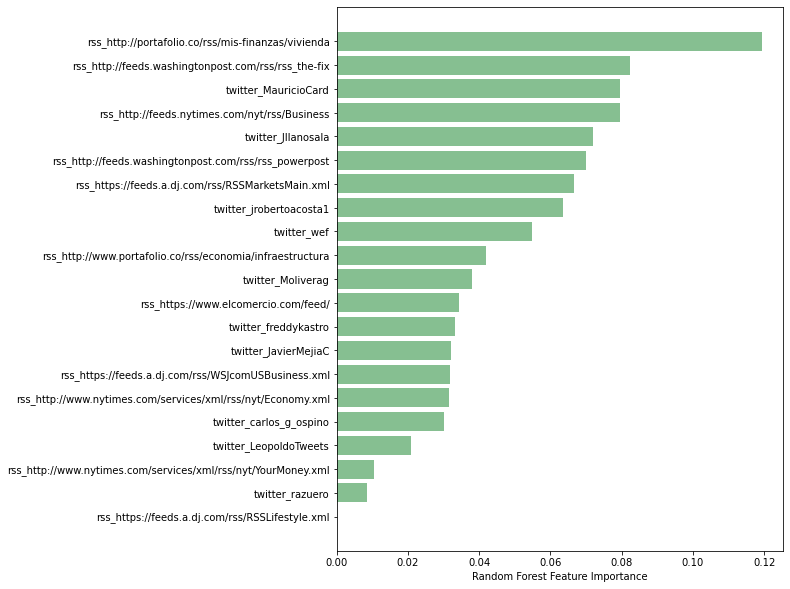

In [287]:
#figsize=(8, 10), color='#86bf91', zorder=2, width=0.85
fig, ax = plt.subplots(figsize=(8, 10))
sorted_idx = modelo_rf_trm.feature_importances_.argsort()
ax=plt.barh(X_train_cf.columns[sorted_idx], modelo_rf_trm.feature_importances_[sorted_idx], color='#86bf91', zorder=2)
plt.xlabel("Random Forest Feature Importance")

In [ ]:
#validacion resultado

In [288]:
params={'n_estimators': 400,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 10,
 'bootstrap': True}

In [289]:
rf = RandomForestRegressor(**params)

In [293]:
rf.fit(X_train_r, y_train_r)

RandomForestRegressor(max_depth=10, max_features='sqrt', min_samples_leaf=4,
                      n_estimators=400)

In [294]:
ypred=rf.predict(X_test_r)
ypred

array([ 1.3811089 , -1.01055846,  0.12185612, -1.37112427, -0.44653542,
        0.48034751,  0.6227044 , -0.95893654])

In [295]:
RMSE=mean_squared_error(y_test_r,ypred, squared=False)
RMSE2=mean_squared_error(y_test_r,ypred, squared=True)
MAPE=mean_absolute_percentage_error(y_test_r,ypred) 
print("RMSE:",RMSE," ","MAPE:",MAPE)

RMSE: 4.407859468257675   MAPE: 1.2549047137004583


In [296]:
## grilla con validacion cruzada

In [297]:
from sklearn.model_selection import GridSearchCV

In [298]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True, False],
    'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
    'max_features': [2, 3, 'sqrt','auto'],
    'min_samples_leaf': [1,2, 3, 4, 5],
    'min_samples_split': [2,4,5,8, 10, 12],
    'n_estimators': [100, 200, 300, 400, 500,1000]
}

In [299]:
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [301]:
# Fit the grid search to the data
grid_search.fit(X_train_r, y_train_r)

Fitting 3 folds for each of 15840 candidates, totalling 47520 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100,
                                       None],
                         'max_features': [2, 3, 'sqrt', 'auto'],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_samples_split': [2, 4, 5, 8, 10, 12],
                         'n_estimators': [100, 200, 300, 400, 500, 1000]},
             verbose=2)

In [302]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 60,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

In [303]:
modelo_rf_trm = grid_search.best_estimator_

In [304]:
ypred=modelo_rf_trm.predict(X_test_r)
ypred

array([ 2.2174, -1.2691,  2.9334, -2.7425,  2.8286, -1.0456,  1.4861,
       -0.811 ])

In [305]:
RMSE=mean_squared_error(y_test_r,ypred, squared=False)
RMSE2=mean_squared_error(y_test_r,ypred, squared=True)
MAPE=mean_absolute_percentage_error(y_test_r,ypred) 
print("RMSE:",RMSE," ","MAPE:",MAPE)

RMSE: 4.61864954437442   MAPE: 1.4100235302467246


In [306]:
#GUARDAR MODELO

In [307]:
from joblib import dump,load

In [308]:
ruta_modelo = f"modeloRF_petroleo.pkl"
dump(modelo_rf_trm, ruta_modelo)

['modeloRF_petroleo.pkl']